In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

def convert_to_df(raw_data, fuel_name):
    """
    Convertit une liste de type [[timestamp, prix], ...] en DataFrame nettoyé.
    """
    # Création du DataFrame
    df = pd.DataFrame(raw_data, columns=['Timestamp', fuel_name])
    
    # Conversion du timestamp (millisecondes) en date lisible
    df['Date'] = pd.to_datetime(df['Timestamp'], unit='ms').dt.date
    
    # On ne garde que la Date et le Prix, et on supprime le timestamp brut
    df = df[['Date', fuel_name]]
    
    # Suppression des doublons éventuels
    df = df.drop_duplicates(subset=['Date'])
    
    return df

def export_to_complete_csv(df_list, filename="prix_carburants_complet.csv"):
    """
    Prend une liste de DataFrames et les fusionne sur la colonne 'Date' 
    pour sortir un CSV unique.
    """
    if not df_list:
        print("La liste de DataFrames est vide.")
        return

    # On commence avec le premier DataFrame
    merged_df = df_list[0]
    
    # On fusionne successivement tous les autres sur la colonne 'Date'
    for next_df in df_list[1:]:
        merged_df = pd.merge(merged_df, next_df, on='Date', how='outer')
    
    # Tri par date pour que le CSV soit chronologique
    merged_df = merged_df.sort_values(by='Date')
    
    # Export en CSV
    merged_df.to_csv(filename, index=False, sep=';', encoding='utf-8-sig')
    print(f"Fichier créé avec succès : {filename}")
    return merged_df

In [8]:
regular80_RUB =[[1421096400000,30.16],[1421701200000,30.16],[1422306000000,30.18],[1422910800000,30.7],[1423515600000,30.69],[1424120400000,30.7],[1424725200000,30.71],[1425330000000,30.7],[1425934800000,30.79],[1426539600000,30.79],[1427144400000,30.79],[1427749200000,30.8],[1428354000000,30.8],[1428958800000,30.81],[1429563600000,30.83],[1430168400000,30.83],[1430773200000,30.85],[1431378000000,30.85],[1431982800000,30.84],[1432587600000,30.85],[1433192400000,30.84],[1433797200000,30.86],[1434402000000,30.9],[1435006800000,30.91],[1435611600000,30.96],[1436216400000,31.15],[1436821200000,31.26],[1437426000000,31.33],[1438030800000,31.43],[1438635600000,31.53],[1439240400000,31.59],[1439845200000,31.69],[1440450000000,31.74],[1441054800000,31.78],[1441659600000,31.83],[1442264400000,31.87],[1442869200000,31.91],[1443474000000,31.95],[1444078800000,32],[1444683600000,32.06],[1445288400000,32.08],[1445893200000,32.16],[1446498000000,32.19],[1447102800000,32.22],[1447707600000,32.21],[1448312400000,32.21],[1448917200000,32.22],[1449522000000,32.21],[1450126800000,32.17],[1450731600000,32.17],[1451336400000,32.16],[1451941200000,32.16],[1452546000000,32.23],[1453150800000,32.23],[1453755600000,32.24],[1454360400000,32.51],[1454965200000,32.5],[1455570000000,32.49],[1456174800000,32.49],[1456779600000,32.5],[1457384400000,32.49],[1457989200000,32.5],[1458594000000,32.54],[1459198800000,32.55],[1459803600000,32.59],[1460408400000,32.6],[1461013200000,32.62],[1461618000000,32.64],[1462222800000,32.67],[1462827600000,32.64],[1463432400000,32.64],[1464037200000,32.79],[1464642000000,32.8],[1465246800000,32.89],[1465851600000,32.95],[1466456400000,33.02],[1467061200000,33.08],[1467666000000,33.09],[1468270800000,33.18],[1468875600000,33.26],[1469480400000,33.34],[1470085200000,33.35],[1470690000000,33.37],[1471294800000,33.41],[1471899600000,33.45],[1472504400000,33.45],[1473109200000,33.45],[1473714000000,33.43],[1474318800000,33.44],[1474923600000,33.48],[1475528400000,33.48],[1476133200000,33.49],[1476738000000,33.5],[1477342800000,33.55],[1477947600000,33.55],[1478552400000,33.55],[1479157200000,33.56],[1479762000000,33.56],[1480366800000,33.57],[1480971600000,33.58],[1481576400000,33.59],[1482181200000,33.6],[1482786000000,33.64],[1483390800000,33.64],[1483995600000,33.6],[1484600400000,33.62],[1485205200000,33.64],[1485810000000,33.68],[1486414800000,33.77],[1487019600000,33.85],[1487624400000,33.88],[1488229200000,33.88],[1488834000000,33.92],[1489438800000,33.92],[1490043600000,33.92],[1490648400000,33.94],[1491253200000,33.95],[1491858000000,33.97],[1492462800000,33.97],[1493067600000,33.98],[1493672400000,33.98],[1494277200000,33.99],[1494882000000,34],[1495486800000,34.02],[1496091600000,34.06],[1496696400000,34.16],[1497301200000,34.22],[1497906000000,34.25],[1498510800000,34.29],[1499115600000,34.33],[1499720400000,34.35],[1500325200000,34.4],[1500930000000,34.42],[1501534800000,34.6],[1502139600000,34.61],[1502744400000,34.62],[1503349200000,34.63],[1503954000000,34.6],[1504558800000,34.6],[1505163600000,34.6],[1505768400000,34.64],[1506373200000,34.7],[1506978000000,34.71],[1507582800000,34.72],[1508187600000,34.72],[1508792400000,34.72],[1509397200000,34.74],[1510002000000,34.84],[1510606800000,34.84],[1511211600000,34.9],[1511816400000,34.94],[1512421200000,35],[1513026000000,35.22],[1513630800000,35.37],[1514235600000,35.52]]
diesel_RUB = [[1421096400000,34.43],[1421701200000,34.48],[1422306000000,34.44],[1422910800000,34.31],[1423515600000,34.19],[1424120400000,34.16],[1424725200000,34.13],[1425330000000,34.13],[1425934800000,34.11],[1426539600000,34.14],[1427144400000,34.16],[1427749200000,34.22],[1428354000000,34.29],[1428958800000,34.34],[1429563600000,34.37],[1430168400000,34.37],[1430773200000,34.36],[1431378000000,34.36],[1431982800000,34.35],[1432587600000,34.36],[1433192400000,34.36],[1433797200000,34.39],[1434402000000,34.42],[1435006800000,34.47],[1435611600000,34.5],[1436216400000,34.57],[1436821200000,34.6],[1437426000000,34.62],[1438030800000,34.64],[1438635600000,34.66],[1439240400000,34.67],[1439845200000,34.7],[1440450000000,34.71],[1441054800000,34.71],[1441659600000,34.72],[1442264400000,34.73],[1442869200000,34.72],[1443474000000,34.73],[1444078800000,34.72],[1444683600000,34.73],[1445288400000,34.76],[1445893200000,34.82],[1446498000000,34.9],[1447102800000,35.04],[1447707600000,35.25],[1448312400000,35.39],[1448917200000,35.42],[1449522000000,35.53],[1450126800000,35.55],[1450731600000,35.56],[1451336400000,35.54],[1451941200000,35.54],[1452546000000,35.54],[1453150800000,35.52],[1453755600000,35.49],[1454360400000,35.46],[1454965200000,35.44],[1455570000000,35.41],[1456174800000,35.39],[1456779600000,35.36],[1457384400000,35.33],[1457989200000,35.31],[1458594000000,35.28],[1459198800000,35.28],[1459803600000,35.27],[1460408400000,35.25],[1461013200000,35.22],[1461618000000,35.2],[1462222800000,35.18],[1462827600000,35.16],[1463432400000,35.15],[1464037200000,35.14],[1464642000000,35.12],[1465246800000,35.17],[1465851600000,35.25],[1466456400000,35.32],[1467061200000,35.39],[1467666000000,35.47],[1468270800000,35.54],[1468875600000,35.56],[1469480400000,35.57],[1470085200000,35.55],[1470690000000,35.57],[1471294800000,35.56],[1471899600000,35.57],[1472504400000,35.55],[1473109200000,35.54],[1473714000000,35.52],[1474318800000,35.51],[1474923600000,35.51],[1475528400000,35.5],[1476133200000,35.49],[1476738000000,35.5],[1477342800000,35.5],[1477947600000,35.55],[1478552400000,35.64],[1479157200000,35.76],[1479762000000,35.94],[1480366800000,36.04],[1480971600000,36.14],[1481576400000,36.35],[1482181200000,36.63],[1482786000000,36.88],[1483390800000,36.88],[1483995600000,37.26],[1484600400000,37.35],[1485205200000,37.53],[1485810000000,37.59],[1486414800000,37.55],[1487019600000,37.6],[1487624400000,37.65],[1488229200000,37.65],[1488834000000,37.65],[1489438800000,37.66],[1490043600000,37.62],[1490648400000,37.59],[1491253200000,37.61],[1491858000000,37.6],[1492462800000,37.58],[1493067600000,37.58],[1493672400000,37.58],[1494277200000,37.6],[1494882000000,37.62],[1495486800000,37.67],[1496091600000,37.74],[1496696400000,37.84],[1497301200000,37.91],[1497906000000,37.97],[1498510800000,38],[1499115600000,38.01],[1499720400000,38.03],[1500325200000,38.05],[1500930000000,38.06],[1501534800000,38.08],[1502139600000,38.09],[1502744400000,38.09],[1503349200000,38.09],[1503954000000,38.1],[1504558800000,38.11],[1505163600000,38.13],[1505768400000,38.15],[1506373200000,38.18],[1506978000000,38.22],[1507582800000,38.25],[1508187600000,38.31],[1508792400000,38.41],[1509397200000,38.53],[1510002000000,38.67],[1510606800000,39],[1511211600000,39.18],[1511816400000,39.49],[1512421200000,39.72],[1513026000000,40.03],[1513630800000,40.26],[1514235600000,40.49],[1514840400000,40.49],[1515445200000,40.71],[1516050000000,40.76],[1516654800000,40.81],[1517259600000,40.84],[1517864400000,40.99],[1518469200000,41],[1519074000000,40.99],[1519678800000,40.98],[1520283600000,40.97],[1520888400000,40.96],[1521493200000,40.96],[1522098000000,40.97],[1522702800000,40.99],[1523307600000,41.06],[1523912400000,41.25],[1524517200000,41.45],[1525122000000,41.6],[1525726800000,41.96],[1526331600000,42.41],[1526936400000,43.1],[1527541200000,43.91],[1528146000000,44.42],[1528750800000,44.44],[1529355600000,44.44],[1529960400000,44.46],[1530565200000,44.46],[1531170000000,44.46],[1531774800000,44.48],[1532379600000,44.47],[1532984400000,44.46],[1533589200000,44.46],[1534194000000,44.47],[1534798800000,44.44],[1535403600000,44.45],[1536008400000,44.45],[1536613200000,44.45],[1537218000000,44.51],[1537822800000,44.54],[1538427600000,44.59],[1539032400000,44.69],[1539637200000,44.81],[1540242000000,44.95],[1540846800000,45.11],[1541451600000,45.26],[1542056400000,45.29],[1542661200000,46.29],[1543266000000,46.49],[1543870800000,46.51],[1544475600000,46.58],[1545080400000,46.6],[1545685200000,46.66],[1546290000000,46.66],[1546894800000,47.14],[1547499600000,47.22],[1548104400000,47.23],[1548709200000,47.24],[1549314000000,47.15],[1549918800000,47.12],[1550523600000,47.08],[1551128400000,47.05],[1551733200000,47],[1552338000000,46.96],[1552942800000,46.9],[1553547600000,46.85],[1554152400000,46.73],[1554757200000,46.63],[1555362000000,46.41],[1555966800000,46.15],[1556571600000,46.1],[1557176400000,46.01],[1557781200000,45.99],[1558386000000,45.97],[1558990800000,46],[1559595600000,46.04],[1560200400000,46.05],[1560805200000,46.06],[1561410000000,46.06],[1562014800000,46.08],[1562619600000,46.08],[1563224400000,46.1],[1563829200000,46.1],[1564434000000,46.14],[1565038800000,46.14],[1565643600000,46.14],[1566248400000,46.14],[1566853200000,46.14],[1567458000000,46.14],[1568062800000,46.15],[1568667600000,46.15],[1569272400000,46.17],[1569877200000,46.19],[1570482000000,46.21],[1571086800000,46.24],[1571691600000,46.33],[1572296400000,46.46],[1572901200000,46.83],[1573506000000,46.97],[1574110800000,47.16],[1574715600000,47.37],[1575320400000,47.47],[1575925200000,47.62],[1576530000000,47.68],[1577134800000,47.72],[1577739600000,47.72],[1578344400000,48.01],[1578949200000,48.04],[1579554000000,48.09],[1580158800000,48.1],[1580763600000,48.15],[1581368400000,48.15],[1581973200000,48.15],[1582578000000,48.14],[1583182800000,48.14],[1583787600000,48.13],[1584392400000,48.11],[1584997200000,48.05],[1585602000000,47.99],[1586206800000,47.91],[1586811600000,47.84],[1587416400000,47.8],[1588021200000,47.75],[1588626000000,47.73],[1589230800000,47.72],[1589835600000,47.71],[1590440400000,47.69],[1591045200000,47.71],[1591650000000,47.74],[1592254800000,47.78],[1592859600000,47.85],[1593464400000,47.88],[1594069200000,47.94],[1594674000000,48.02],[1595278800000,48.01],[1595883600000,48.03],[1596488400000,48.05],[1597093200000,48.04],[1597698000000,48.04],[1598302800000,48.05],[1598907600000,48.05],[1599512400000,48.05],[1600117200000,48.04],[1600722000000,48.02],[1601326800000,48.04],[1601931600000,48.05],[1602536400000,48.07],[1603141200000,48.07],[1603746000000,48.08],[1604350800000,48.17],[1604955600000,48.31],[1605560400000,48.41],[1606165200000,48.45],[1606770000000,48.54],[1607374800000,48.6],[1607979600000,48.62],[1608584400000,48.68],[1609189200000,48.74],[1610398800000,48.84],[1611003600000,48.89],[1611608400000,48.94],[1612213200000,48.96],[1612818000000,49.02],[1613422800000,49.09],[1614027600000,49.12],[1614632400000,49.18],[1615237200000,49.25],[1615842000000,49.3],[1616446800000,49.34],[1617051600000,49.42],[1617656400000,49.49],[1618261200000,49.53],[1618866000000,49.51],[1619470800000,49.52],[1620075600000,49.53],[1620680400000,49.55],[1621285200000,49.57],[1621890000000,49.6],[1622494800000,49.71],[1623099600000,49.7],[1623704400000,49.77],[1624309200000,49.82],[1624914000000,49.91],[1625518800000,50.01],[1626123600000,50.12],[1626728400000,50.18],[1627333200000,50.28],[1627938000000,50.35],[1628542800000,50.48],[1629147600000,50.59],[1629752400000,50.66],[1630357200000,50.69],[1630962000000,50.62],[1631566800000,50.63],[1632171600000,50.62],[1632776400000,50.64],[1633381200000,50.65],[1633986000000,50.69],[1634590800000,50.86],[1635195600000,51.02],[1635800400000,51.3],[1636405200000,51.59],[1637010000000,52.1],[1637614800000,52.65],[1638219600000,53.03],[1638824400000,53.33],[1639429200000,53.64],[1640034000000,53.81],[1640638800000,53.94],[1641243600000,53.94],[1641848400000,54.37],[1642453200000,54.46],[1643058000000,54.69],[1643662800000,54.87],[1644267600000,54.62],[1644872400000,54.78],[1645477200000,54.9],[1646082000000,55.04],[1646686800000,55.04],[1647291600000,54.97],[1647896400000,54.9],[1648501200000,54.83],[1649106000000,54.69],[1649710800000,54.62],[1650315600000,54.59],[1650920400000,54.54],[1651525200000,54.49],[1652130000000,54.49],[1652734800000,54.5],[1653339600000,54.46],[1653944400000,54.44],[1654549200000,54.42],[1655154000000,54.4],[1655758800000,54.39],[1656363600000,54.43],[1656968400000,54.42],[1657573200000,54.4],[1658178000000,54.4],[1658782800000,54.44],[1659387600000,54.45],[1659992400000,54.43],[1660597200000,54.47],[1661202000000,54.58],[1661806800000,54.68],[1662411600000,54.74],[1663016400000,54.76],[1663621200000,54.82],[1664226000000,54.93],[1664830800000,55.01],[1665435600000,55.11],[1666040400000,55.26],[1666645200000,55.41],[1667250000000,55.54],[1667854800000,55.69],[1668459600000,55.95],[1669064400000,56.47],[1669669200000,57.02],[1670274000000,57.46],[1670878800000,57.83],[1671483600000,58.14],[1672088400000,58.37],[1672693200000,58.37],[1673298000000,58.7],[1673902800000,58.81],[1674507600000,58.81],[1675112400000,58.82],[1675717200000,58.81],[1676322000000,58.68],[1676926800000,58.57],[1677531600000,58.54],[1678136400000,58.4],[1678741200000,58.38],[1679346000000,58.36],[1679950800000,58.3],[1680555600000,58.27],[1681160400000,58.22],[1681765200000,58.2],[1682370000000,58.17],[1682974800000,58.16],[1683579600000,58.1],[1684184400000,58.1],[1684789200000,58.13],[1685394000000,58.17],[1685998800000,58.19],[1686603600000,58.21],[1687208400000,58.27],[1687813200000,58.31],[1688418000000,58.38],[1689022800000,58.42],[1689627600000,58.45],[1690232400000,58.58],[1690837200000,58.8],[1691442000000,58.9],[1692046800000,59.27],[1692651600000,60.03],[1693256400000,60.84],[1693861200000,61.58],[1694466000000,62.64],[1695070800000,63.96],[1695675600000,64.99],[1696280400000,64.9],[1696885200000,64.61],[1697490000000,64.39],[1698094800000,64.22],[1698699600000,64.06],[1699304400000,64.07],[1699909200000,64.06],[1700514000000,64.08],[1701118800000,64.26],[1701723600000,64.27],[1702328400000,64.33],[1702933200000,64.37],[1703538000000,64.37],[1704142800000,64.37],[1704747600000,64.47],[1705352400000,64.46],[1705957200000,64.48],[1706562000000,64.43],[1707166800000,64.89],[1707771600000,64.85],[1708376400000,64.79],[1708981200000,64.81],[1709586000000,64.79],[1710190800000,64.74],[1710795600000,64.72],[1711400400000,64.78],[1712005200000,64.9],[1712610000000,65],[1713214800000,65.08],[1713819600000,65.13],[1714424400000,65.17],[1715029200000,65.2],[1715634000000,65.21],[1716238800000,65.28],[1716843600000,65.33],[1717448400000,65.43],[1718053200000,65.51],[1718658000000,65.56],[1719262800000,65.71],[1719867600000,65.84],[1720472400000,65.99],[1721077200000,66.15],[1721682000000,66.34],[1722286800000,66.53],[1722891600000,66.61],[1723496400000,66.71],[1724101200000,66.8],[1724706000000,66.84],[1725310800000,66.86],[1725915600000,66.86],[1726520400000,66.89],[1727125200000,66.94],[1727730000000,66.97],[1728334800000,67.03],[1728939600000,67.09],[1729544400000,67.21],[1730149200000,67.45],[1730754000000,67.79],[1731358800000,68.04],[1731963600000,68.41],[1732568400000,68.76],[1733173200000,69.04],[1733778000000,69.32],[1734382800000,69.61],[1734987600000,69.88],[1735592400000,69.88],[1736197200000,69.88],[1736802000000,70.15],[1737406800000,70.15],[1738011600000,70.2],[1738616400000,70.73],[1739221200000,70.2],[1739826000000,70.86],[1740430800000,70.9],[1741035600000,70.98],[1741640400000,70.99],[1742245200000,70.98],[1742850000000,70.98],[1743454800000,70.98],[1744059600000,71.04],[1744664400000,71.09],[1745269200000,71.12],[1745874000000,71.25],[1746478800000,71.3],[1747083600000,71.31],[1747688400000,71.34],[1748293200000,71.35],[1748898000000,71.39],[1749502800000,71.44],[1750107600000,71.43],[1750712400000,71.44],[1751317200000,71.49],[1751922000000,71.48],[1752526800000,71.48],[1753131600000,71.47],[1753736400000,71.5],[1754341200000,71.49],[1754946000000,71.5],[1755550800000,71.45],[1756155600000,71.52],[1756760400000,71.57],[1757365200000,71.73],[1757970000000,71.88],[1758574800000,72.2],[1759179600000,72.63],[1759784400000,72.94],[1760389200000,73.24],[1760994000000,73.56],[1761598800000,73.9],[1762203600000,74.56],[1762808400000,74.8],[1763413200000,75.21]]
regular92_RUB = [[1421096400000,32.34],[1421701200000,32.32],[1422306000000,32.26],[1422910800000,32.21],[1423515600000,32.14],[1424120400000,32.12],[1424725200000,32.08],[1425330000000,32.06],[1425934800000,32.08],[1426539600000,32.09],[1427144400000,32.1],[1427749200000,32.12],[1428354000000,32.14],[1428958800000,32.15],[1429563600000,32.16],[1430168400000,32.17],[1430773200000,32.18],[1431378000000,32.17],[1431982800000,32.17],[1432587600000,32.18],[1433192400000,32.19],[1433797200000,32.24],[1434402000000,32.36],[1435006800000,32.48],[1435611600000,32.62],[1436216400000,32.91],[1436821200000,33.15],[1437426000000,33.3],[1438030800000,33.44],[1438635600000,33.59],[1439240400000,33.7],[1439845200000,33.84],[1440450000000,33.94],[1441054800000,34.05],[1441659600000,34.13],[1442264400000,34.19],[1442869200000,34.25],[1443474000000,34.27],[1444078800000,34.3],[1444683600000,34.32],[1445288400000,34.34],[1445893200000,34.35],[1446498000000,34.35],[1447102800000,34.33],[1447707600000,34.32],[1448312400000,34.31],[1448917200000,34.29],[1449522000000,34.24],[1450126800000,34.14],[1450731600000,34],[1451336400000,33.95],[1451941200000,33.95],[1452546000000,33.91],[1453150800000,33.89],[1453755600000,33.85],[1454360400000,33.8],[1454965200000,33.79],[1455570000000,33.8],[1456174800000,33.79],[1456779600000,33.78],[1457384400000,33.87],[1457989200000,33.93],[1458594000000,34.05],[1459198800000,34.17],[1459803600000,34.26],[1460408400000,34.31],[1461013200000,34.36],[1461618000000,34.38],[1462222800000,34.39],[1462827600000,34.39],[1463432400000,34.41],[1464037200000,34.41],[1464642000000,34.41],[1465246800000,34.45],[1465851600000,34.56],[1466456400000,34.65],[1467061200000,34.76],[1467666000000,34.85],[1468270800000,34.98],[1468875600000,35.09],[1469480400000,35.13],[1470085200000,35.16],[1470690000000,35.19],[1471294800000,35.19],[1471899600000,35.2],[1472504400000,35.21],[1473109200000,35.21],[1473714000000,35.19],[1474318800000,35.19],[1474923600000,35.16],[1475528400000,35.15],[1476133200000,35.14],[1476738000000,35.13],[1477342800000,35.12],[1477947600000,35.13],[1478552400000,35.13],[1479157200000,35.14],[1479762000000,35.14],[1480366800000,35.16],[1480971600000,35.17],[1481576400000,35.19],[1482181200000,35.23],[1482786000000,35.29],[1483390800000,35.29],[1483995600000,35.38],[1484600400000,35.46],[1485205200000,35.57],[1485810000000,35.63],[1486414800000,35.64],[1487019600000,35.7],[1487624400000,35.74],[1488229200000,35.79],[1488834000000,35.86],[1489438800000,35.91],[1490043600000,35.95],[1490648400000,36.01],[1491253200000,36.07],[1491858000000,36.13],[1492462800000,36.17],[1493067600000,36.21],[1493672400000,36.28],[1494277200000,36.34],[1494882000000,36.37],[1495486800000,36.44],[1496091600000,36.53],[1496696400000,36.69],[1497301200000,36.83],[1497906000000,36.94],[1498510800000,36.98],[1499115600000,36.98],[1499720400000,37.01],[1500325200000,37.03],[1500930000000,37.04],[1501534800000,37.07],[1502139600000,37.08],[1502744400000,37.1],[1503349200000,37.11],[1503954000000,37.12],[1504558800000,37.13],[1505163600000,37.15],[1505768400000,37.18],[1506373200000,37.22],[1506978000000,37.24],[1507582800000,37.24],[1508187600000,37.25],[1508792400000,37.26],[1509397200000,37.27],[1510002000000,37.28],[1510606800000,37.3],[1511211600000,37.33],[1511816400000,37.44],[1512421200000,37.59],[1513026000000,37.77],[1513630800000,37.9],[1514235600000,38.01],[1514840400000,38.01],[1515445200000,38.08],[1516050000000,38.09],[1516654800000,38.1],[1517259600000,38.1],[1517864400000,38.07],[1518469200000,38.07],[1519074000000,38.06],[1519678800000,38.06],[1520283600000,38.06],[1520888400000,38.05],[1521493200000,38.05],[1522098000000,38.06],[1522702800000,38.11],[1523307600000,38.16],[1523912400000,38.3],[1524517200000,38.47],[1525122000000,38.65],[1525726800000,39.03],[1526331600000,39.51],[1526936400000,40.28],[1527541200000,41.09],[1528146000000,41.68],[1528750800000,41.74],[1529355600000,41.68],[1529960400000,41.65],[1530565200000,41.64],[1531170000000,41.61],[1531774800000,41.57],[1532379600000,41.53],[1532984400000,41.51],[1533589200000,41.43],[1534194000000,41.39],[1534798800000,41.36],[1535403600000,41.35],[1536008400000,41.33],[1536613200000,41.33],[1537218000000,41.34],[1537822800000,41.35],[1538427600000,41.37],[1539032400000,41.39],[1539637200000,41.43],[1540242000000,41.47],[1540846800000,41.53],[1541451600000,41.55],[1542056400000,41.55],[1542661200000,41.54],[1543266000000,41.55],[1543870800000,41.54],[1544475600000,41.53],[1545080400000,41.5],[1545685200000,41.48],[1546290000000,41.48],[1546894800000,41.67],[1547499600000,41.75],[1548104400000,41.81],[1548709200000,41.8],[1549314000000,41.82],[1549918800000,41.8],[1550523600000,41.76],[1551128400000,41.73],[1551733200000,41.71],[1552338000000,41.7],[1552942800000,41.67],[1553547600000,41.67],[1554152400000,41.65],[1554757200000,41.67],[1555362000000,41.66],[1555966800000,41.66],[1556571600000,41.67],[1557176400000,41.67],[1557781200000,41.68],[1558386000000,41.7],[1558990800000,41.77],[1559595600000,41.97],[1560200400000,42.09],[1560805200000,42.11],[1561410000000,42.13],[1562014800000,42.17],[1562619600000,42.18],[1563224400000,42.2],[1563829200000,42.2],[1564434000000,42.22],[1565038800000,42.23],[1565643600000,42.23],[1566248400000,42.24],[1566853200000,42.23],[1567458000000,42.23],[1568062800000,42.23],[1568667600000,42.23],[1569272400000,42.23],[1569877200000,42.24],[1570482000000,42.25],[1571086800000,42.26],[1571691600000,42.26],[1572296400000,42.26],[1572901200000,42.27],[1573506000000,42.25],[1574110800000,42.25],[1574715600000,42.24],[1575320400000,42.23],[1575925200000,42.23],[1576530000000,42.22],[1577134800000,42.24],[1577739600000,42.24],[1578344400000,42.34],[1578949200000,42.35],[1579554000000,42.35],[1580158800000,42.39],[1580763600000,42.45],[1581368400000,42.45],[1581973200000,42.46],[1582578000000,42.48],[1583182800000,42.51],[1583787600000,42.52],[1584392400000,42.52],[1584997200000,42.52],[1585602000000,42.51],[1586206800000,42.49],[1586811600000,42.45],[1587416400000,42.42],[1588021200000,42.41],[1588626000000,42.39],[1589230800000,42.38],[1589835600000,42.38],[1590440400000,42.4],[1591045200000,42.42],[1591650000000,42.47],[1592254800000,42.55],[1592859600000,42.66],[1593464400000,42.7],[1594069200000,42.78],[1594674000000,42.97],[1595278800000,43.02],[1595883600000,43.06],[1596488400000,43.08],[1597093200000,43.1],[1597698000000,43.11],[1598302800000,43.14],[1598907600000,43.15],[1599512400000,43.16],[1600117200000,43.16],[1600722000000,43.16],[1601326800000,43.17],[1601931600000,43.18],[1602536400000,43.21],[1603141200000,43.21],[1603746000000,43.21],[1604350800000,43.22],[1604955600000,43.22],[1605560400000,43.22],[1606165200000,43.21],[1606770000000,43.22],[1607374800000,43.23],[1607979600000,43.23],[1608584400000,43.23],[1609189200000,43.28],[1610398800000,43.46],[1611003600000,43.56],[1611608400000,43.7],[1612213200000,43.87],[1612818000000,44.02],[1613422800000,44.12],[1614027600000,44.2],[1614632400000,44.27],[1615237200000,44.38],[1615842000000,44.51],[1616446800000,44.64],[1617051600000,44.76],[1617656400000,44.89],[1618261200000,44.94],[1618866000000,44.95],[1619470800000,44.97],[1620075600000,45],[1620680400000,45.01],[1621285200000,45.03],[1621890000000,45.07],[1622494800000,45.12],[1623099600000,45.2],[1623704400000,45.26],[1624309200000,45.31],[1624914000000,45.34],[1625518800000,45.4],[1626123600000,45.46],[1626728400000,45.52],[1627333200000,45.63],[1627938000000,45.72],[1628542800000,45.82],[1629147600000,45.97],[1629752400000,46.1],[1630357200000,46.16],[1630962000000,45.99],[1631566800000,45.94],[1632171600000,45.93],[1632776400000,45.94],[1633381200000,45.97],[1633986000000,46.02],[1634590800000,46.19],[1635195600000,46.26],[1635800400000,46.37],[1636405200000,46.44],[1637010000000,46.54],[1637614800000,46.65],[1638219600000,46.72],[1638824400000,46.88],[1639429200000,46.96],[1640034000000,47.06],[1640638800000,47.11],[1641243600000,47.11],[1641848400000,47.4],[1642453200000,47.43],[1643058000000,47.48],[1643662800000,47.56],[1644267600000,47.56],[1644872400000,47.58],[1645477200000,47.61],[1646082000000,47.6],[1646686800000,47.6],[1647291600000,47.56],[1647896400000,47.52],[1648501200000,47.51],[1649106000000,47.48],[1649710800000,47.44],[1650315600000,47.4],[1650920400000,47.37],[1651525200000,47.35],[1652130000000,47.33],[1652734800000,47.32],[1653339600000,47.28],[1653944400000,47.24],[1654549200000,47.23],[1655154000000,47.21],[1655758800000,47.2],[1656363600000,47.18],[1656968400000,47.17],[1657573200000,47.15],[1658178000000,47.14],[1658782800000,47.14],[1659387600000,47.15],[1659992400000,47.17],[1660597200000,47.18],[1661202000000,47.22],[1661806800000,47.24],[1662411600000,47.24],[1663016400000,47.24],[1663621200000,47.25],[1664226000000,47.25],[1664830800000,47.22],[1665435600000,47.22],[1666040400000,47.21],[1666645200000,47.21],[1667250000000,47.2],[1667854800000,47.19],[1668459600000,47.18],[1669064400000,47.21],[1669669200000,47.23],[1670274000000,47.22],[1670878800000,47.22],[1671483600000,47.21],[1672088400000,47.21],[1672693200000,47.21],[1673298000000,47.18],[1673902800000,47.18],[1674507600000,47.19],[1675112400000,47.18],[1675717200000,47.17],[1676322000000,47.16],[1676926800000,47.15],[1677531600000,47.14],[1678136400000,47.14],[1678741200000,47.14],[1679346000000,47.15],[1679950800000,47.17],[1680555600000,47.19],[1681160400000,47.2],[1681765200000,47.19],[1682370000000,47.2],[1682974800000,47.27],[1683579600000,47.29],[1684184400000,47.38],[1684789200000,47.5],[1685394000000,47.65],[1685998800000,47.79],[1686603600000,47.96],[1687208400000,48.12],[1687813200000,48.32],[1688418000000,48.46],[1689022800000,48.64],[1689627600000,48.88],[1690232400000,49.18],[1690837200000,49.44],[1691442000000,49.75],[1692046800000,49.99],[1692651600000,50.23],[1693256400000,50.42],[1693861200000,50.67],[1694466000000,51.02],[1695070800000,51.41],[1695675600000,51.62],[1696280400000,51.41],[1696885200000,51.12],[1697490000000,50.93],[1698094800000,50.8],[1698699600000,50.66],[1699304400000,50.54],[1699909200000,50.46],[1700514000000,50.35],[1701118800000,50.29],[1701723600000,50.21],[1702328400000,50.14],[1702933200000,50.15],[1703538000000,50.26],[1704142800000,50.26],[1704747600000,50.51],[1705352400000,50.52],[1705957200000,50.54],[1706562000000,50.55],[1707166800000,50.57],[1707771600000,50.58],[1708376400000,50.57],[1708981200000,50.57],[1709586000000,50.55],[1710190800000,50.54],[1710795600000,50.56],[1711400400000,50.59],[1712005200000,50.62],[1712610000000,50.67],[1713214800000,50.79],[1713819600000,50.82],[1714424400000,50.86],[1715029200000,50.87],[1715634000000,50.89],[1716238800000,50.94],[1716843600000,50.99],[1717448400000,51.13],[1718053200000,51.24],[1718658000000,51.33],[1719262800000,51.56],[1719867600000,51.85],[1720472400000,52.17],[1721077200000,52.44],[1721682000000,52.72],[1722286800000,52.9],[1722891600000,53],[1723496400000,53.07],[1724101200000,53.15],[1724706000000,53.2],[1725310800000,53.26],[1725915600000,53.37],[1726520400000,53.43],[1727125200000,53.47],[1727730000000,53.51],[1728334800000,53.57],[1728939600000,53.61],[1729544400000,53.67],[1730149200000,53.77],[1730754000000,53.87],[1731358800000,53.93],[1731963600000,54.1],[1732568400000,54.32],[1733173200000,54.55],[1733778000000,54.8],[1734382800000,54.99],[1734987600000,55.18],[1735592400000,55.18],[1736197200000,55.18],[1736802000000,55.49],[1737406800000,55.55],[1738011600000,55.57],[1738616400000,55.61],[1739221200000,55.57],[1739826000000,55.78],[1740430800000,55.82],[1741035600000,55.93],[1741640400000,56.02],[1742245200000,56.06],[1742850000000,56.12],[1743454800000,56.15],[1744059600000,56.29],[1744664400000,56.36],[1745269200000,56.41],[1745874000000,56.46],[1746478800000,56.49],[1747083600000,56.53],[1747688400000,56.57],[1748293200000,56.62],[1748898000000,56.69],[1749502800000,56.73],[1750107600000,56.78],[1750712400000,56.92],[1751317200000,57.04],[1751922000000,57.22],[1752526800000,57.46],[1753131600000,57.66],[1753736400000,57.83],[1754341200000,57.99],[1754946000000,58.23],[1755550800000,58.48],[1756155600000,58.83],[1756760400000,59.01],[1757365200000,59.35],[1757970000000,59.63],[1758574800000,60.05],[1759179600000,60.61],[1759784400000,61.19],[1760389200000,61.73],[1760994000000,62.13],[1761598800000,62.37],[1762203600000,62.25],[1762808400000,62.1],[1763413200000,61.88]]
super95_RUB = [[1421096400000,35.12],[1421701200000,35.11],[1422306000000,35.08],[1422910800000,35.05],[1423515600000,35.02],[1424120400000,35],[1424725200000,34.97],[1425330000000,34.96],[1425934800000,34.98],[1426539600000,34.99],[1427144400000,34.99],[1427749200000,35],[1428354000000,35.01],[1428958800000,35.05],[1429563600000,35.06],[1430168400000,35.07],[1430773200000,35.07],[1431378000000,35.07],[1431982800000,35.06],[1432587600000,35.06],[1433192400000,35.07],[1433797200000,35.11],[1434402000000,35.22],[1435006800000,35.32],[1435611600000,35.48],[1436216400000,35.72],[1436821200000,35.99],[1437426000000,36.13],[1438030800000,36.23],[1438635600000,36.39],[1439240400000,36.48],[1439845200000,36.64],[1440450000000,36.76],[1441054800000,36.86],[1441659600000,36.93],[1442264400000,36.99],[1442869200000,37.05],[1443474000000,37.07],[1444078800000,37.1],[1444683600000,37.12],[1445288400000,37.14],[1445893200000,37.14],[1446498000000,37.14],[1447102800000,37.13],[1447707600000,37.13],[1448312400000,37.12],[1448917200000,37.11],[1449522000000,37.07],[1450126800000,36.99],[1450731600000,36.89],[1451336400000,36.84],[1451941200000,36.84],[1452546000000,36.8],[1453150800000,36.78],[1453755600000,36.74],[1454360400000,36.76],[1454965200000,36.75],[1455570000000,36.77],[1456174800000,36.76],[1456779600000,36.76],[1457384400000,36.86],[1457989200000,36.9],[1458594000000,37.01],[1459198800000,37.14],[1459803600000,37.23],[1460408400000,37.27],[1461013200000,37.33],[1461618000000,37.36],[1462222800000,37.37],[1462827600000,37.39],[1463432400000,37.4],[1464037200000,37.41],[1464642000000,37.43],[1465246800000,37.47],[1465851600000,37.59],[1466456400000,37.68],[1467061200000,37.81],[1467666000000,37.9],[1468270800000,38.04],[1468875600000,38.15],[1469480400000,38.2],[1470085200000,38.24],[1470690000000,38.25],[1471294800000,38.27],[1471899600000,38.28],[1472504400000,38.29],[1473109200000,38.3],[1473714000000,38.29],[1474318800000,38.28],[1474923600000,38.28],[1475528400000,38.27],[1476133200000,38.26],[1476738000000,38.26],[1477342800000,38.25],[1477947600000,38.25],[1478552400000,38.27],[1479157200000,38.27],[1479762000000,38.27],[1480366800000,38.29],[1480971600000,38.31],[1481576400000,38.33],[1482181200000,38.36],[1482786000000,38.4],[1483390800000,38.4],[1483995600000,38.53],[1484600400000,38.61],[1485205200000,38.72],[1485810000000,38.78],[1486414800000,38.85],[1487019600000,38.9],[1487624400000,38.95],[1488229200000,39],[1488834000000,39.06],[1489438800000,39.1],[1490043600000,39.15],[1490648400000,39.2],[1491253200000,39.27],[1491858000000,39.33],[1492462800000,39.38],[1493067600000,39.42],[1493672400000,39.5],[1494277200000,39.56],[1494882000000,39.59],[1495486800000,39.66],[1496091600000,39.74],[1496696400000,39.83],[1497301200000,39.91],[1497906000000,39.97],[1498510800000,40.01],[1499115600000,40.02],[1499720400000,40.04],[1500325200000,40.06],[1500930000000,40.07],[1501534800000,40.1],[1502139600000,40.1],[1502744400000,40.12],[1503349200000,40.14],[1503954000000,40.15],[1504558800000,40.17],[1505163600000,40.18],[1505768400000,40.21],[1506373200000,40.24],[1506978000000,40.26],[1507582800000,40.27],[1508187600000,40.29],[1508792400000,40.3],[1509397200000,40.31],[1510002000000,40.33],[1510606800000,40.35],[1511211600000,40.41],[1511816400000,40.51],[1512421200000,40.66],[1513026000000,40.85],[1513630800000,40.99],[1514235600000,41.09],[1514840400000,41.09],[1515445200000,41.02],[1516050000000,41.04],[1516654800000,41.04],[1517259600000,41.04],[1517864400000,41.04],[1518469200000,41.04],[1519074000000,41.04],[1519678800000,41.04],[1520283600000,41.03],[1520888400000,41.03],[1521493200000,41.04],[1522098000000,41.05],[1522702800000,41.12],[1523307600000,41.16],[1523912400000,41.31],[1524517200000,41.48],[1525122000000,41.65],[1525726800000,42.03],[1526331600000,42.49],[1526936400000,43.27],[1527541200000,44.06],[1528146000000,44.64],[1528750800000,44.69],[1529355600000,44.68],[1529960400000,44.66],[1530565200000,44.67],[1531170000000,44.67],[1531774800000,44.65],[1532379600000,44.59],[1532984400000,44.58],[1533589200000,44.55],[1534194000000,44.54],[1534798800000,44.53],[1535403600000,44.52],[1536008400000,44.53],[1536613200000,44.53],[1537218000000,44.54],[1537822800000,44.56],[1538427600000,44.57],[1539032400000,44.62],[1539637200000,44.69],[1540242000000,44.75],[1540846800000,44.81],[1541451600000,44.83],[1542056400000,44.83],[1542661200000,44.83],[1543266000000,44.84],[1543870800000,44.83],[1544475600000,44.82],[1545080400000,44.79],[1545685200000,44.77],[1546290000000,44.77],[1546894800000,44.96],[1547499600000,45.04],[1548104400000,45.09],[1548709200000,45.1],[1549314000000,45.1],[1549918800000,45.1],[1550523600000,45.05],[1551128400000,45.03],[1551733200000,45.01],[1552338000000,45.01],[1552942800000,44.98],[1553547600000,44.97],[1554152400000,44.96],[1554757200000,44.98],[1555362000000,44.98],[1555966800000,44.98],[1556571600000,44.99],[1557176400000,44.99],[1557781200000,45],[1558386000000,45.03],[1558990800000,45.11],[1559595600000,45.3],[1560200400000,45.43],[1560805200000,45.45],[1561410000000,45.48],[1562014800000,45.52],[1562619600000,45.54],[1563224400000,45.57],[1563829200000,45.58],[1564434000000,45.62],[1565038800000,45.64],[1565643600000,45.65],[1566248400000,45.66],[1566853200000,45.66],[1567458000000,45.66],[1568062800000,45.66],[1568667600000,45.66],[1569272400000,45.67],[1569877200000,45.69],[1570482000000,45.7],[1571086800000,45.72],[1571691600000,45.72],[1572296400000,45.73],[1572901200000,45.74],[1573506000000,45.75],[1574110800000,45.75],[1574715600000,45.76],[1575320400000,45.75],[1575925200000,45.75],[1576530000000,45.74],[1577134800000,45.76],[1577739600000,45.76],[1578344400000,45.79],[1578949200000,45.79],[1579554000000,45.8],[1580158800000,45.83],[1580763600000,45.89],[1581368400000,45.9],[1581973200000,45.9],[1582578000000,45.91],[1583182800000,45.92],[1583787600000,45.93],[1584392400000,45.93],[1584997200000,45.93],[1585602000000,45.93],[1586206800000,45.92],[1586811600000,45.88],[1587416400000,45.85],[1588021200000,45.85],[1588626000000,45.81],[1589230800000,45.81],[1589835600000,45.83],[1590440400000,45.84],[1591045200000,45.86],[1591650000000,45.93],[1592254800000,46.03],[1592859600000,46.2],[1593464400000,46.26],[1594069200000,46.38],[1594674000000,46.61],[1595278800000,46.69],[1595883600000,46.77],[1596488400000,46.83],[1597093200000,46.86],[1597698000000,46.88],[1598302800000,46.91],[1598907600000,46.93],[1599512400000,46.94],[1600117200000,46.93],[1600722000000,46.93],[1601326800000,46.93],[1601931600000,46.94],[1602536400000,46.97],[1603141200000,46.97],[1603746000000,46.96],[1604350800000,46.96],[1604955600000,46.97],[1605560400000,46.97],[1606165200000,46.97],[1606770000000,46.96],[1607374800000,46.97],[1607979600000,46.97],[1608584400000,46.98],[1609189200000,47.04],[1610398800000,47.24],[1611003600000,47.33],[1611608400000,47.45],[1612213200000,47.54],[1612818000000,47.69],[1613422800000,47.79],[1614027600000,47.86],[1614632400000,47.92],[1615237200000,48.03],[1615842000000,48.12],[1616446800000,48.25],[1617051600000,48.35],[1617656400000,48.48],[1618261200000,48.53],[1618866000000,48.54],[1619470800000,48.56],[1620075600000,48.61],[1620680400000,48.62],[1621285200000,48.63],[1621890000000,48.69],[1622494800000,48.75],[1623099600000,48.88],[1623704400000,48.96],[1624309200000,48.99],[1624914000000,49.03],[1625518800000,49.11],[1626123600000,49.17],[1626728400000,49.24],[1627333200000,49.36],[1627938000000,49.47],[1628542800000,49.58],[1629147600000,49.75],[1629752400000,49.89],[1630357200000,49.98],[1630962000000,49.82],[1631566800000,49.76],[1632171600000,49.74],[1632776400000,49.76],[1633381200000,49.78],[1633986000000,49.84],[1634590800000,49.99],[1635195600000,50.06],[1635800400000,50.17],[1636405200000,50.23],[1637010000000,50.34],[1637614800000,50.47],[1638219600000,50.55],[1638824400000,50.73],[1639429200000,50.82],[1640034000000,50.94],[1640638800000,51.01],[1641243600000,51.01],[1641848400000,51.29],[1642453200000,51.32],[1643058000000,51.4],[1643662800000,51.5],[1644267600000,51.58],[1644872400000,51.6],[1645477200000,51.63],[1646082000000,51.63],[1646686800000,51.61],[1647291600000,51.57],[1647896400000,51.54],[1648501200000,51.53],[1649106000000,51.51],[1649710800000,51.46],[1650315600000,51.43],[1650920400000,51.42],[1651525200000,51.41],[1652130000000,51.4],[1652734800000,51.39],[1653339600000,51.34],[1653944400000,51.31],[1654549200000,51.27],[1655154000000,51.27],[1655758800000,51.25],[1656363600000,51.23],[1656968400000,51.23],[1657573200000,51.21],[1658178000000,51.21],[1658782800000,51.21],[1659387600000,51.22],[1659992400000,51.23],[1660597200000,51.25],[1661202000000,51.31],[1661806800000,51.32],[1662411600000,51.33],[1663016400000,51.34],[1663621200000,51.35],[1664226000000,51.35],[1664830800000,51.34],[1665435600000,51.33],[1666040400000,51.33],[1666645200000,51.32],[1667250000000,51.3],[1667854800000,51.3],[1668459600000,51.3],[1669064400000,51.32],[1669669200000,51.35],[1670274000000,51.35],[1670878800000,51.36],[1671483600000,51.35],[1672088400000,51.35],[1672693200000,51.35],[1673298000000,51.34],[1673902800000,51.34],[1674507600000,51.35],[1675112400000,51.36],[1675717200000,51.4],[1676322000000,51.39],[1676926800000,51.38],[1677531600000,51.39],[1678136400000,51.38],[1678741200000,51.39],[1679346000000,51.39],[1679950800000,51.41],[1680555600000,51.41],[1681160400000,51.41],[1681765200000,51.41],[1682370000000,51.41],[1682974800000,51.5],[1683579600000,51.52],[1684184400000,51.62],[1684789200000,51.79],[1685394000000,51.96],[1685998800000,52.11],[1686603600000,52.28],[1687208400000,52.48],[1687813200000,52.72],[1688418000000,52.88],[1689022800000,53.09],[1689627600000,53.36],[1690232400000,53.69],[1690837200000,53.97],[1691442000000,54.32],[1692046800000,54.58],[1692651600000,54.85],[1693256400000,55.07],[1693861200000,55.38],[1694466000000,55.77],[1695070800000,56.24],[1695675600000,56.47],[1696280400000,56.16],[1696885200000,55.81],[1697490000000,55.63],[1698094800000,55.48],[1698699600000,55.34],[1699304400000,55.2],[1699909200000,55.1],[1700514000000,54.99],[1701118800000,54.9],[1701723600000,54.8],[1702328400000,54.74],[1702933200000,54.75],[1703538000000,54.87],[1704142800000,54.87],[1704747600000,55.15],[1705352400000,55.16],[1705957200000,55.18],[1706562000000,55.2],[1707166800000,55.23],[1707771600000,55.23],[1708376400000,55.22],[1708981200000,55.22],[1709586000000,55.22],[1710190800000,55.21],[1710795600000,55.23],[1711400400000,55.3],[1712005200000,55.3],[1712610000000,55.41],[1713214800000,55.56],[1713819600000,55.62],[1714424400000,55.7],[1715029200000,55.7],[1715634000000,55.74],[1716238800000,55.79],[1716843600000,55.85],[1717448400000,55.98],[1718053200000,56.11],[1718658000000,56.19],[1719262800000,56.41],[1719867600000,56.69],[1720472400000,57.02],[1721077200000,57.32],[1721682000000,57.64],[1722286800000,57.9],[1722891600000,58.04],[1723496400000,58.17],[1724101200000,58.29],[1724706000000,58.39],[1725310800000,58.46],[1725915600000,58.65],[1726520400000,58.74],[1727125200000,58.79],[1727730000000,58.83],[1728334800000,58.86],[1728939600000,58.88],[1729544400000,58.95],[1730149200000,59.02],[1730754000000,59.11],[1731358800000,59.14],[1731963600000,59.31],[1732568400000,59.51],[1733173200000,59.71],[1733778000000,59.98],[1734382800000,60.19],[1734987600000,60.38],[1735592400000,60.38],[1736197200000,60.38],[1736802000000,60.63],[1737406800000,60.67],[1738011600000,60.68],[1738616400000,60.74],[1739221200000,60.68],[1739826000000,60.89],[1740430800000,60.94],[1741035600000,61.06],[1741640400000,61.18],[1742245200000,61.22],[1742850000000,61.3],[1743454800000,61.33],[1744059600000,61.46],[1744664400000,61.56],[1745269200000,61.62],[1745874000000,61.68],[1746478800000,61.72],[1747083600000,61.75],[1747688400000,61.81],[1748293200000,61.87],[1748898000000,61.93],[1749502800000,61.97],[1750107600000,62.04],[1750712400000,62.17],[1751317200000,62.28],[1751922000000,62.44],[1752526800000,62.69],[1753131600000,62.9],[1753736400000,63.06],[1754341200000,63.25],[1754946000000,63.52],[1755550800000,63.82],[1756155600000,64.22],[1756760400000,64.42],[1757365200000,64.78],[1757970000000,65.07],[1758574800000,65.44],[1759179600000,65.9],[1759784400000,66.41],[1760389200000,66.86],[1760994000000,67.21],[1761598800000,67.46],[1762203600000,67.34],[1762808400000,67.21],[1763413200000,67.07]]
super98_RUB = [[1515445200000,46.15],[1516050000000,46.17],[1516654800000,46.2],[1517259600000,46.26],[1517864400000,46.31],[1518469200000,46.36],[1519074000000,46.37],[1519678800000,46.38],[1520283600000,46.37],[1520888400000,46.37],[1521493200000,46.37],[1522098000000,46.39],[1522702800000,46.45],[1523307600000,46.52],[1523912400000,46.62],[1524517200000,46.76],[1525122000000,46.92],[1525726800000,47.33],[1526331600000,47.71],[1526936400000,48.27],[1527541200000,49.06],[1528146000000,49.71],[1528750800000,49.74],[1529355600000,49.72],[1529960400000,49.75],[1530565200000,49.87],[1531170000000,49.88],[1531774800000,49.89],[1532379600000,49.84],[1532984400000,49.82],[1533589200000,49.82],[1534194000000,49.82],[1534798800000,49.83],[1535403600000,49.82],[1536008400000,49.84],[1536613200000,49.84],[1537218000000,49.88],[1537822800000,49.87],[1538427600000,49.91],[1539032400000,49.95],[1539637200000,50.04],[1540242000000,50.11],[1540846800000,50.17],[1541451600000,50.25],[1542056400000,50.26],[1542661200000,50.27],[1543266000000,50.33],[1543870800000,50.38],[1544475600000,50.41],[1545080400000,50.43],[1545685200000,50.43],[1546290000000,50.43],[1546894800000,50.79],[1547499600000,50.91],[1548104400000,50.99],[1548709200000,51.02],[1549314000000,50.87],[1549918800000,50.87],[1550523600000,50.86],[1551128400000,50.79],[1551733200000,50.77],[1552338000000,50.78],[1552942800000,50.76],[1553547600000,50.76],[1554152400000,50.75],[1554757200000,50.71],[1555362000000,50.7],[1555966800000,50.72],[1556571600000,50.73],[1557176400000,50.76],[1557781200000,50.77],[1558386000000,50.78],[1558990800000,50.84],[1559595600000,50.91],[1560200400000,50.94],[1560805200000,50.95],[1561410000000,50.98],[1562014800000,51.07],[1562619600000,51.14],[1563224400000,51.15],[1563829200000,51.17],[1564434000000,51.23],[1565038800000,51.31],[1565643600000,51.38],[1566248400000,51.41],[1566853200000,51.46],[1567458000000,51.46],[1568062800000,51.47],[1568667600000,51.47],[1569272400000,51.49],[1569877200000,51.55],[1570482000000,51.58],[1571086800000,51.63],[1571691600000,51.65],[1572296400000,51.66],[1572901200000,51.68],[1573506000000,51.68],[1574110800000,51.68],[1574715600000,51.71],[1575320400000,51.73],[1575925200000,51.76],[1576530000000,51.76],[1577134800000,51.77],[1577739600000,51.77],[1578344400000,51.86],[1578949200000,51.87],[1579554000000,51.89],[1580158800000,51.9],[1580763600000,51.96],[1581368400000,51.96],[1581973200000,51.97],[1582578000000,51.98],[1583182800000,52],[1583787600000,52.02],[1584392400000,52.02],[1584997200000,52.03],[1585602000000,52.04],[1586206800000,52.08],[1586811600000,52.07],[1587416400000,52.07],[1588021200000,52.07],[1588626000000,52.07],[1589230800000,52.07],[1589835600000,52.07],[1590440400000,52.07],[1591045200000,52.07],[1591650000000,52.1],[1592254800000,52.13],[1592859600000,52.24],[1593464400000,52.27],[1594069200000,52.37],[1594674000000,52.53],[1595278800000,52.63],[1595883600000,52.69],[1596488400000,52.73],[1597093200000,52.79],[1597698000000,52.83],[1598302800000,52.89],[1598907600000,52.94],[1599512400000,52.98],[1600117200000,52.99],[1600722000000,53.06],[1601326800000,53.09],[1601931600000,53.14],[1602536400000,53.2],[1603141200000,53.23],[1603746000000,53.25],[1604350800000,53.3],[1604955600000,53.33],[1605560400000,53.35],[1606165200000,53.36],[1606770000000,53.38],[1607374800000,53.4],[1607979600000,53.41],[1608584400000,53.41],[1609189200000,53.55],[1610398800000,53.9],[1611003600000,54.01],[1611608400000,54.11],[1612213200000,54.11],[1612818000000,54.25],[1613422800000,54.41],[1614027600000,54.48],[1614632400000,54.55],[1615237200000,54.69],[1615842000000,54.77],[1616446800000,54.83],[1617051600000,54.95],[1617656400000,55.11],[1618261200000,55.16],[1618866000000,55.2],[1619470800000,55.22],[1620075600000,55.26],[1620680400000,55.26],[1621285200000,55.28],[1621890000000,55.37],[1622494800000,55.44],[1623099600000,55.63],[1623704400000,55.74],[1624309200000,55.8],[1624914000000,55.87],[1625518800000,56.05],[1626123600000,56.13],[1626728400000,56.32],[1627333200000,56.53],[1627938000000,56.72],[1628542800000,56.99],[1629147600000,57.34],[1629752400000,57.56],[1630357200000,57.65],[1630962000000,57.57],[1631566800000,57.56],[1632171600000,57.57],[1632776400000,57.59],[1633381200000,57.6],[1633986000000,57.66],[1634590800000,57.83],[1635195600000,57.91],[1635800400000,58.05],[1636405200000,58.13],[1637010000000,58.36],[1637614800000,58.56],[1638219600000,58.59],[1638824400000,58.84],[1639429200000,59],[1640034000000,59.12],[1640638800000,59.17],[1641243600000,59.17],[1641848400000,59.42],[1642453200000,59.48],[1643058000000,59.57],[1643662800000,59.69],[1644267600000,59.9],[1644872400000,59.93],[1645477200000,59.97],[1646082000000,60.01],[1646686800000,60.17],[1647291600000,60.16],[1647896400000,60.16],[1648501200000,60.16],[1649106000000,60.16],[1649710800000,60.17],[1650315600000,60.15],[1650920400000,60.17],[1651525200000,60.21],[1652130000000,60.2],[1652734800000,60.2],[1653339600000,60.15],[1653944400000,60.14],[1654549200000,60.12],[1655154000000,60.12],[1655758800000,60.12],[1656363600000,60.12],[1656968400000,60.12],[1657573200000,60.11],[1658178000000,60.11],[1658782800000,60.11],[1659387600000,60.13],[1659992400000,60.15],[1660597200000,60.17],[1661202000000,60.44],[1661806800000,60.59],[1662411600000,60.67],[1663016400000,60.72],[1663621200000,60.86],[1664226000000,60.94],[1664830800000,61.07],[1665435600000,61.16],[1666040400000,61.25],[1666645200000,61.3],[1667250000000,61.33],[1667854800000,61.34],[1668459600000,61.34],[1669064400000,61.41],[1669669200000,61.5],[1670274000000,61.52],[1670878800000,61.56],[1671483600000,61.57],[1672088400000,61.58],[1672693200000,61.58],[1673298000000,61.61],[1673902800000,61.62],[1674507600000,61.6],[1675112400000,61.6],[1675717200000,61.59],[1676322000000,61.59],[1676926800000,61.58],[1677531600000,61.58],[1678136400000,61.59],[1678741200000,61.59],[1679346000000,61.59],[1679950800000,61.64],[1680555600000,61.64],[1681160400000,61.65],[1681765200000,61.65],[1682370000000,61.68],[1682974800000,61.8],[1683579600000,61.83],[1684184400000,61.93],[1684789200000,62.07],[1685394000000,62.25],[1685998800000,62.52],[1686603600000,62.74],[1687208400000,62.92],[1687813200000,63.15],[1688418000000,63.26],[1689022800000,63.38],[1689627600000,63.8],[1690232400000,64.07],[1690837200000,64.4],[1691442000000,64.81],[1692046800000,65.34],[1692651600000,65.97],[1693256400000,66.52],[1693861200000,66.9],[1694466000000,67.37],[1695070800000,67.89],[1695675600000,68.45],[1696280400000,68.31],[1696885200000,68.3],[1697490000000,68.33],[1698094800000,68.3],[1698699600000,68.27],[1699304400000,68.23],[1699909200000,68.2],[1700514000000,68.18],[1701118800000,68.16],[1701723600000,68.14],[1702328400000,68.09],[1702933200000,68.18],[1703538000000,68.36],[1704142800000,68.36],[1704747600000,68.59],[1705352400000,68.62],[1705957200000,68.62],[1706562000000,68.62],[1707166800000,68.62],[1707771600000,68.62],[1708376400000,68.63],[1708981200000,68.63],[1709586000000,68.62],[1710190800000,68.65],[1710795600000,68.66],[1711400400000,68.67],[1712005200000,68.7],[1712610000000,68.91],[1713214800000,69.06],[1713819600000,69.15],[1714424400000,69.22],[1715029200000,69.37],[1715634000000,69.48],[1716238800000,69.69],[1716843600000,69.78],[1717448400000,69.96],[1718053200000,70.13],[1718658000000,70.23],[1719262800000,70.43],[1719867600000,70.74],[1720472400000,71.15],[1721077200000,71.62],[1721682000000,72.04],[1722286800000,72.53],[1722891600000,73.25],[1723496400000,74.09],[1724101200000,74.77],[1724706000000,75.4],[1725310800000,76.08],[1725915600000,77.04],[1726520400000,77.76],[1727125200000,78.36],[1727730000000,78.86],[1728334800000,79.29],[1728939600000,79.59],[1729544400000,79.98],[1730149200000,80.26],[1730754000000,80.48],[1731358800000,80.7],[1731963600000,80.95],[1732568400000,81.17],[1733173200000,81.45],[1733778000000,81.83],[1734382800000,82.15],[1734987600000,82.55],[1735592400000,82.55],[1736197200000,82.55],[1736802000000,83.09],[1737406800000,83.14],[1738011600000,83.2],[1738616400000,83.4],[1739221200000,83.2],[1739826000000,83.56],[1740430800000,83.67],[1741035600000,83.78],[1741640400000,83.8],[1742245200000,83.81],[1742850000000,83.82],[1743454800000,83.83],[1744059600000,83.94],[1744664400000,83.98],[1745269200000,84.01],[1745874000000,84.05],[1746478800000,84.03],[1747083600000,84.05],[1747688400000,84.07],[1748293200000,84.1],[1748898000000,84.17],[1749502800000,84.19],[1750107600000,84.28],[1750712400000,84.32],[1751317200000,84.42],[1751922000000,84.46],[1752526800000,84.49],[1753131600000,84.51],[1753736400000,84.54],[1754341200000,84.55],[1754946000000,84.58],[1755550800000,84.68],[1756155600000,84.78],[1756760400000,84.87],[1757365200000,85.04],[1757970000000,85.2],[1758574800000,85.33],[1759179600000,85.51],[1759784400000,86.06],[1760389200000,86.46],[1760994000000,86.85],[1761598800000,87.26],[1762203600000,87.9],[1762808400000,88.01],[1763413200000,88.27]]

In [23]:
diesel_EUR = [[1421096400000,0.504],[1421701200000,0.455],[1422306000000,0.479],[1422910800000,0.439],[1423515600000,0.452],[1424120400000,0.459],[1424725200000,0.487],[1425330000000,0.497],[1425934800000,0.516],[1426539600000,0.526],[1427144400000,0.533],[1427749200000,0.547],[1428354000000,0.555],[1428958800000,0.633],[1429563600000,0.63],[1430168400000,0.629],[1430773200000,0.601],[1431378000000,0.604],[1431982800000,0.603],[1432587600000,0.619],[1433192400000,0.592],[1433797200000,0.543],[1434402000000,0.56],[1435006800000,0.566],[1435611600000,0.562],[1436216400000,0.56],[1436821200000,0.55],[1437426000000,0.559],[1438030800000,0.545],[1438635600000,0.525],[1439240400000,0.497],[1439845200000,0.48],[1440450000000,0.453],[1441054800000,0.463],[1441659600000,0.46],[1442264400000,0.452],[1442869200000,0.463],[1443474000000,0.475],[1444078800000,0.472],[1444683600000,0.501],[1445288400000,0.498],[1445893200000,0.506],[1446498000000,0.493],[1447102800000,0.506],[1447707600000,0.491],[1448312400000,0.51],[1448917200000,0.503],[1449522000000,0.482],[1450126800000,0.469],[1450731600000,0.459],[1451336400000,0.461],[1451941200000,0.446],[1452546000000,0.446],[1453150800000,0.426],[1453755600000,0.407],[1454360400000,0.433],[1454965200000,0.409],[1455570000000,0.394],[1456174800000,0.412],[1456779600000,0.426],[1457384400000,0.441],[1457989200000,0.45],[1458594000000,0.457],[1459198800000,0.462],[1459803600000,0.461],[1460408400000,0.46],[1461013200000,0.474],[1461618000000,0.471],[1462222800000,0.48],[1462827600000,0.465],[1463432400000,0.477],[1464037200000,0.472],[1464642000000,0.476],[1465246800000,0.472],[1465851600000,0.482],[1466456400000,0.48],[1467061200000,0.487],[1467666000000,0.499],[1468270800000,0.499],[1468875600000,0.506],[1469480400000,0.499],[1470085200000,0.478],[1470690000000,0.487],[1471294800000,0.496],[1471899600000,0.491],[1472504400000,0.486],[1473109200000,0.482],[1473714000000,0.491],[1474318800000,0.486],[1474923600000,0.496],[1475528400000,0.5],[1476133200000,0.513],[1476738000000,0.512],[1477342800000,0.522],[1477947600000,0.518],[1478552400000,0.505],[1479157200000,0.503],[1479762000000,0.521],[1480366800000,0.527],[1480971600000,0.528],[1481576400000,0.509],[1482181200000,0.568],[1482786000000,0.58],[1483390800000,0.578],[1483995600000,0.584],[1484600400000,0.592],[1485205200000,0.589],[1485810000000,0.584],[1486414800000,0.588],[1487019600000,0.6],[1487624400000,0.613],[1488229200000,0.623],[1488834000000,0.607],[1489438800000,0.6],[1490043600000,0.603],[1490648400000,0.608],[1491253200000,0.629],[1491858000000,0.621],[1492462800000,0.629],[1493067600000,0.623],[1493672400000,0.606],[1494277200000,0.585],[1494882000000,0.606],[1495486800000,0.592],[1496091600000,0.593],[1496696400000,0.595],[1497301200000,0.594],[1497906000000,0.589],[1498510800000,0.57],[1499115600000,0.561],[1499720400000,0.552],[1500325200000,0.557],[1500930000000,0.554],[1501534800000,0.547],[1502139600000,0.531],[1502744400000,0.538],[1503349200000,0.546],[1503954000000,0.547],[1504558800000,0.552],[1505163600000,0.555],[1505768400000,0.556],[1506373200000,0.553],[1506978000000,0.558],[1507582800000,0.566],[1508187600000,0.562],[1508792400000,0.566],[1509397200000,0.571],[1510002000000,0.568],[1510606800000,0.565],[1511211600000,0.557],[1511816400000,0.57],[1512421200000,0.569],[1513026000000,0.575],[1513630800000,0.58],[1514235600000,0.586],[1514840400000,0.588],[1515445200000,0.591],[1516050000000,0.597],[1516654800000,0.588],[1517259600000,0.587],[1517864400000,0.585],[1518469200000,0.574],[1519074000000,0.58],[1519678800000,0.589],[1520283600000,0.59],[1520888400000,0.581],[1521493200000,0.578],[1522098000000,0.582],[1522702800000,0.581],[1523307600000,0.581],[1523912400000,0.545],[1524517200000,0.548],[1525122000000,0.553],[1525726800000,0.555],[1526331600000,0.577],[1526936400000,0.589],[1527541200000,0.609],[1528146000000,0.611],[1528750800000,0.606],[1529355600000,0.613],[1529960400000,0.603],[1530565200000,0.609],[1531170000000,0.602],[1531774800000,0.614],[1532379600000,0.601],[1532984400000,0.606],[1533589200000,0.605],[1534194000000,0.58],[1534798800000,0.583],[1535403600000,0.567],[1536008400000,0.559],[1536613200000,0.553],[1537218000000,0.557],[1537822800000,0.57],[1538427600000,0.585],[1539032400000,0.583],[1539637200000,0.586],[1540242000000,0.597],[1540846800000,0.604],[1541451600000,0.604],[1542056400000,0.597],[1542661200000,0.618],[1543266000000,0.62],[1543870800000,0.614],[1544475600000,0.612],[1545080400000,0.618],[1545685200000,0.598],[1546290000000,0.587],[1546894800000,0.593],[1547499600000,0.612],[1548104400000,0.625],[1548709200000,0.633],[1549314000000,0.627],[1549918800000,0.629],[1550523600000,0.626],[1551128400000,0.633],[1551733200000,0.628],[1552338000000,0.63],[1552942800000,0.633],[1553547600000,0.645],[1554152400000,0.643],[1554757200000,0.635],[1555362000000,0.637],[1555966800000,0.642],[1556571600000,0.639],[1557176400000,0.636],[1557781200000,0.629],[1558386000000,0.636],[1558990800000,0.636],[1559595600000,0.632],[1560200400000,0.629],[1560805200000,0.634],[1561410000000,0.646],[1562014800000,0.642],[1562619600000,0.643],[1563224400000,0.649],[1563829200000,0.651],[1564434000000,0.656],[1565038800000,0.643],[1565643600000,0.632],[1566248400000,0.63],[1566853200000,0.635],[1567458000000,0.629],[1568062800000,0.633],[1568667600000,0.645],[1569272400000,0.654],[1569877200000,0.657],[1570482000000,0.648],[1571086800000,0.654],[1571691600000,0.651],[1572296400000,0.653],[1572901200000,0.655],[1573506000000,0.667],[1574110800000,0.67],[1574715600000,0.672],[1575320400000,0.673],[1575925200000,0.673],[1576530000000,0.683],[1577134800000,0.688],[1577739600000,0.691],[1578344400000,0.692],[1578949200000,0.706],[1579554000000,0.702],[1580158800000,0.704],[1580763600000,0.692],[1581368400000,0.692],[1581973200000,0.7],[1582578000000,0.693],[1583182800000,0.653],[1583787600000,0.635],[1584392400000,0.588],[1584997200000,0.571],[1585602000000,0.56],[1586206800000,0.559],[1586811600000,0.593],[1587416400000,0.597],[1588021200000,0.595],[1588626000000,0.603],[1589230800000,0.596],[1589835600000,0.603],[1590440400000,0.608],[1591045200000,0.607],[1591650000000,0.612],[1592254800000,0.608],[1592859600000,0.613],[1593464400000,0.617],[1594069200000,0.605],[1594674000000,0.598],[1595278800000,0.588],[1595883600000,0.578],[1596488400000,0.55],[1597093200000,0.551],[1597698000000,0.556],[1598302800000,0.548],[1598907600000,0.541],[1599512400000,0.54],[1600117200000,0.542],[1600722000000,0.54],[1601326800000,0.536],[1601931600000,0.525],[1602536400000,0.53],[1603141200000,0.526],[1603746000000,0.532],[1604350800000,0.52],[1604955600000,0.529],[1605560400000,0.53],[1606165200000,0.537],[1606770000000,0.537],[1607374800000,0.538],[1607979600000,0.548],[1608584400000,0.542],[1609189200000,0.542],[1610398800000,0.538],[1611003600000,0.538],[1611608400000,0.541],[1612213200000,0.53],[1612818000000,0.545],[1613422800000,0.548],[1614027600000,0.548],[1614632400000,0.544],[1615237200000,0.554],[1615842000000,0.562],[1616446800000,0.558],[1617051600000,0.554],[1617656400000,0.552],[1618261200000,0.54],[1618866000000,0.547],[1619470800000,0.547],[1620075600000,0.547],[1620680400000,0.554],[1621285200000,0.553],[1621890000000,0.551],[1622494800000,0.554],[1623099600000,0.56],[1623704400000,0.57],[1624309200000,0.579],[1624914000000,0.579],[1625518800000,0.574],[1626123600000,0.569],[1626728400000,0.573],[1627333200000,0.579],[1627938000000,0.579],[1628542800000,0.584],[1629147600000,0.587],[1629752400000,0.583],[1630357200000,0.582],[1630962000000,0.585],[1631566800000,0.588],[1632171600000,0.592],[1632776400000,0.591],[1633381200000,0.6],[1633986000000,0.61],[1634590800000,0.615],[1635195600000,0.618],[1635800400000,0.623],[1636405200000,0.623],[1637010000000,0.634],[1637614800000,0.638],[1638219600000,0.624],[1638824400000,0.641],[1639429200000,0.645],[1640034000000,0.644],[1640638800000,0.65],[1641243600000,0.642],[1641848400000,0.647],[1642453200000,0.627],[1643058000000,0.629],[1643662800000,0.633],[1644267600000,0.627],[1644872400000,0.642],[1645477200000,0.637],[1646082000000,0.588],[1646686800000,0.476],[1647291600000,0.426],[1647896400000,0.48],[1648501200000,0.521],[1649106000000,0.594],[1649710800000,0.668],[1650315600000,0.627],[1650920400000,0.682],[1651525200000,0.731],[1652130000000,0.766],[1652734800000,0.828],[1653339600000,0.894],[1653944400000,0.784],[1654549200000,0.826],[1655154000000,0.892],[1655758800000,0.917],[1656363600000,0.973],[1656968400000,0.966],[1657573200000,0.877],[1658178000000,0.94],[1658782800000,0.943],[1659387600000,0.87],[1659992400000,0.887],[1660597200000,0.871],[1661202000000,0.919],[1661806800000,0.913],[1662411600000,0.909],[1663016400000,0.9],[1663621200000,0.916],[1664226000000,0.973],[1664830800000,1.043],[1665435600000,0.919],[1666040400000,0.885],[1666645200000,0.926],[1667250000000,0.909],[1667854800000,0.919],[1668459600000,0.909],[1669064400000,0.904],[1669669200000,0.907],[1670274000000,0.884],[1670878800000,0.878],[1671483600000,0.845],[1672088400000,0.799],[1672693200000,0.772],[1673298000000,0.776],[1673902800000,0.804],[1674507600000,0.791],[1675112400000,0.78],[1675717200000,0.766],[1676322000000,0.752],[1676926800000,0.736],[1677531600000,0.736],[1678136400000,0.73],[1678741200000,0.726],[1679346000000,0.716],[1679950800000,0.708],[1680555600000,0.693],[1681160400000,0.645],[1681765200000,0.645],[1682370000000,0.651],[1682974800000,0.658],[1683579600000,0.684],[1684184400000,0.69],[1684789200000,0.674],[1685394000000,0.677],[1685998800000,0.668],[1686603600000,0.654],[1687208400000,0.636],[1687813200000,0.637],[1688418000000,0.608],[1689022800000,0.585],[1689627600000,0.578],[1690232400000,0.582],[1690837200000,0.588],[1691442000000,0.567],[1692046800000,0.549],[1692651600000,0.592],[1693256400000,0.595],[1693861200000,0.589],[1694466000000,0.597],[1695070800000,0.621],[1695675600000,0.636],[1696280400000,0.629],[1696885200000,0.609],[1697490000000,0.628],[1698094800000,0.633],[1698699600000,0.651],[1699304400000,0.647],[1699909200000,0.652],[1700514000000,0.662],[1701118800000,0.663],[1701723600000,0.656],[1702328400000,0.651],[1702933200000,0.654],[1703538000000,0.636],[1704142800000,0.649],[1704747600000,0.65],[1705352400000,0.666],[1705957200000,0.669],[1706562000000,0.664],[1707166800000,0.658],[1707771600000,0.662],[1708376400000,0.652],[1708981200000,0.645],[1709586000000,0.656],[1710190800000,0.655],[1710795600000,0.647],[1711400400000,0.646],[1712005200000,0.652],[1712610000000,0.649],[1713214800000,0.653],[1713819600000,0.654],[1714424400000,0.665],[1715029200000,0.662],[1715634000000,0.659],[1716238800000,0.661],[1716843600000,0.673],[1717448400000,0.669],[1718053200000,0.678],[1718658000000,0.689],[1719262800000,0.697],[1719867600000,0.712],[1720472400000,0.69],[1721077200000,0.691],[1721682000000,0.691],[1722286800000,0.713],[1722891600000,0.718],[1723496400000,0.69],[1724101200000,0.683],[1724706000000,0.658],[1725310800000,0.664],[1725915600000,0.671],[1726520400000,0.664],[1727125200000,0.648],[1727730000000,0.647],[1728334800000,0.64],[1728939600000,0.638],[1729544400000,0.641],[1730149200000,0.644],[1730754000000,0.639],[1731358800000,0.645],[1731963600000,0.647],[1732568400000,0.64],[1733173200000,0.604],[1733778000000,0.652],[1734382800000,0.639],[1734987600000,0.656],[1735592400000,0.659],[1736197200000,0.659],[1736802000000,0.668],[1737406800000,0.669],[1738011600000,0.68],[1738616400000,0.693],[1739221200000,0.694],[1739826000000,0.747],[1740430800000,0.771],[1741035600000,0.775],[1741640400000,0.733],[1742245200000,0.758],[1742850000000,0.776],[1743454800000,0.792],[1744059600000,0.764],[1744664400000,0.739],[1745269200000,0.771],[1745874000000,0.755],[1746478800000,0.768],[1747083600000,0.774],[1747688400000,0.786],[1748293200000,0.788],[1748898000000,0.8],[1749502800000,0.79],[1750107600000,0.794],[1750712400000,0.793],[1751317200000,0.775],[1751922000000,0.769],[1752526800000,0.784],[1753131600000,0.785],[1753736400000,0.766],[1754341200000,0.78],[1754946000000,0.77],[1755550800000,0.762],[1756155600000,0.764],[1756760400000,0.761],[1757365200000,0.751],[1757970000000,0.724],[1758574800000,0.73],[1759179600000,0.744],[1759784400000,0.759],[1760389200000,0.779],[1760994000000,0.778],[1761598800000,0.785],[1762203600000,0.798],[1762808400000,0.797],[1763413200000,0.791]]
regular80_EUR = [[1421096400000,0.441],[1421701200000,0.398],[1422306000000,0.42],[1422910800000,0.393],[1423515600000,0.406],[1424120400000,0.413],[1424725200000,0.439],[1425330000000,0.447],[1425934800000,0.466],[1426539600000,0.474],[1427144400000,0.481],[1427749200000,0.492],[1428354000000,0.499],[1428958800000,0.568],[1429563600000,0.566],[1430168400000,0.564],[1430773200000,0.54],[1431378000000,0.542],[1431982800000,0.541],[1432587600000,0.555],[1433192400000,0.532],[1433797200000,0.487],[1434402000000,0.503],[1435006800000,0.507],[1435611600000,0.504],[1436216400000,0.504],[1436821200000,0.497],[1437426000000,0.506],[1438030800000,0.494],[1438635600000,0.478],[1439240400000,0.453],[1439845200000,0.438],[1440450000000,0.414],[1441054800000,0.423],[1441659600000,0.422],[1442264400000,0.415],[1442869200000,0.426],[1443474000000,0.437],[1444078800000,0.435],[1444683600000,0.462],[1445288400000,0.46],[1445893200000,0.468],[1446498000000,0.455],[1447102800000,0.465],[1447707600000,0.448],[1448312400000,0.464],[1448917200000,0.458],[1449522000000,0.437],[1450126800000,0.425],[1450731600000,0.416],[1451336400000,0.417],[1451941200000,0.404],[1452546000000,0.405],[1453150800000,0.387],[1453755600000,0.37],[1454360400000,0.397],[1454965200000,0.375],[1455570000000,0.362],[1456174800000,0.378],[1456779600000,0.392],[1457384400000,0.406],[1457989200000,0.414],[1458594000000,0.422],[1459198800000,0.426],[1459803600000,0.426],[1460408400000,0.425],[1461013200000,0.439],[1461618000000,0.437],[1462222800000,0.446],[1462827600000,0.432],[1463432400000,0.443],[1464037200000,0.44],[1464642000000,0.444],[1465246800000,0.441],[1465851600000,0.45],[1466456400000,0.449],[1467061200000,0.455],[1467666000000,0.466],[1468270800000,0.466],[1468875600000,0.473],[1469480400000,0.468],[1470085200000,0.448],[1470690000000,0.457],[1471294800000,0.466],[1471899600000,0.462],[1472504400000,0.458],[1473109200000,0.454],[1473714000000,0.462],[1474318800000,0.458],[1474923600000,0.468],[1475528400000,0.472],[1476133200000,0.484],[1476738000000,0.483],[1477342800000,0.493],[1477947600000,0.489],[1478552400000,0.475],[1479157200000,0.472],[1479762000000,0.486],[1480366800000,0.491],[1480971600000,0.49],[1481576400000,0.471],[1482181200000,0.521],[1482786000000,0.529],[1483390800000,0.527],[1483995600000,0.527],[1484600400000,0.533],[1485205200000,0.528],[1485810000000,0.523],[1486414800000,0.529],[1487019600000,0.54],[1487624400000,0.551],[1488229200000,0.56],[1488834000000,0.547],[1489438800000,0.541],[1490043600000,0.544],[1490648400000,0.549],[1491253200000,0.568],[1491858000000,0.561],[1492462800000,0.568],[1493067600000,0.563],[1493672400000,0.548],[1494277200000,0.529],[1494882000000,0.548],[1495486800000,0.535],[1496091600000,0.535],[1496696400000,0.537],[1497301200000,0.536],[1497906000000,0.531],[1498510800000,0.514],[1499115600000,0.506],[1499720400000,0.498],[1500325200000,0.503],[1500930000000,0.501],[1501534800000,0.497],[1502139600000,0.483],[1502744400000,0.489],[1503349200000,0.497],[1503954000000,0.496],[1504558800000,0.501],[1505163600000,0.504],[1505768400000,0.505],[1506373200000,0.502],[1506978000000,0.507],[1507582800000,0.514],[1508187600000,0.51],[1508792400000,0.511],[1509397200000,0.514],[1510002000000,0.512],[1510606800000,0.505],[1511211600000,0.496],[1511816400000,0.504],[1512421200000,0.502],[1513026000000,0.506],[1513630800000,0.509],[1514235600000,0.514]]
regular92_EUR = [[1421096400000,0.473],[1421701200000,0.426],[1422306000000,0.449],[1422910800000,0.412],[1423515600000,0.425],[1424120400000,0.432],[1424725200000,0.458],[1425330000000,0.467],[1425934800000,0.485],[1426539600000,0.494],[1427144400000,0.501],[1427749200000,0.513],[1428354000000,0.521],[1428958800000,0.592],[1429563600000,0.59],[1430168400000,0.589],[1430773200000,0.563],[1431378000000,0.565],[1431982800000,0.565],[1432587600000,0.579],[1433192400000,0.555],[1433797200000,0.509],[1434402000000,0.526],[1435006800000,0.533],[1435611600000,0.531],[1436216400000,0.533],[1436821200000,0.527],[1437426000000,0.538],[1438030800000,0.526],[1438635600000,0.509],[1439240400000,0.483],[1439845200000,0.468],[1440450000000,0.443],[1441054800000,0.454],[1441659600000,0.453],[1442264400000,0.445],[1442869200000,0.457],[1443474000000,0.469],[1444078800000,0.466],[1444683600000,0.495],[1445288400000,0.492],[1445893200000,0.499],[1446498000000,0.485],[1447102800000,0.496],[1447707600000,0.478],[1448312400000,0.494],[1448917200000,0.487],[1449522000000,0.465],[1450126800000,0.451],[1450731600000,0.439],[1451336400000,0.441],[1451941200000,0.426],[1452546000000,0.426],[1453150800000,0.407],[1453755600000,0.388],[1454360400000,0.413],[1454965200000,0.39],[1455570000000,0.376],[1456174800000,0.394],[1456779600000,0.407],[1457384400000,0.423],[1457989200000,0.433],[1458594000000,0.441],[1459198800000,0.447],[1459803600000,0.448],[1460408400000,0.447],[1461013200000,0.462],[1461618000000,0.46],[1462222800000,0.469],[1462827600000,0.455],[1463432400000,0.467],[1464037200000,0.462],[1464642000000,0.466],[1465246800000,0.462],[1465851600000,0.472],[1466456400000,0.471],[1467061200000,0.478],[1467666000000,0.49],[1468270800000,0.492],[1468875600000,0.499],[1469480400000,0.493],[1470085200000,0.473],[1470690000000,0.482],[1471294800000,0.491],[1471899600000,0.486],[1472504400000,0.482],[1473109200000,0.478],[1473714000000,0.486],[1474318800000,0.482],[1474923600000,0.491],[1475528400000,0.496],[1476133200000,0.508],[1476738000000,0.506],[1477342800000,0.516],[1477947600000,0.512],[1478552400000,0.498],[1479157200000,0.494],[1479762000000,0.509],[1480366800000,0.514],[1480971600000,0.514],[1481576400000,0.493],[1482181200000,0.546],[1482786000000,0.555],[1483390800000,0.553],[1483995600000,0.554],[1484600400000,0.562],[1485205200000,0.558],[1485810000000,0.554],[1486414800000,0.558],[1487019600000,0.57],[1487624400000,0.582],[1488229200000,0.592],[1488834000000,0.579],[1489438800000,0.572],[1490043600000,0.576],[1490648400000,0.582],[1491253200000,0.603],[1491858000000,0.597],[1492462800000,0.605],[1493067600000,0.6],[1493672400000,0.585],[1494277200000,0.566],[1494882000000,0.586],[1495486800000,0.573],[1496091600000,0.574],[1496696400000,0.577],[1497301200000,0.577],[1497906000000,0.573],[1498510800000,0.555],[1499115600000,0.545],[1499720400000,0.537],[1500325200000,0.542],[1500930000000,0.539],[1501534800000,0.532],[1502139600000,0.517],[1502744400000,0.524],[1503349200000,0.532],[1503954000000,0.533],[1504558800000,0.538],[1505163600000,0.541],[1505768400000,0.542],[1506373200000,0.539],[1506978000000,0.544],[1507582800000,0.551],[1508187600000,0.547],[1508792400000,0.549],[1509397200000,0.552],[1510002000000,0.548],[1510606800000,0.541],[1511211600000,0.531],[1511816400000,0.54],[1512421200000,0.539],[1513026000000,0.542],[1513630800000,0.546],[1514235600000,0.55],[1514840400000,0.552],[1515445200000,0.553],[1516050000000,0.558],[1516654800000,0.549],[1517259600000,0.547],[1517864400000,0.543],[1518469200000,0.533],[1519074000000,0.539],[1519678800000,0.547],[1520283600000,0.548],[1520888400000,0.539],[1521493200000,0.537],[1522098000000,0.54],[1522702800000,0.54],[1523307600000,0.54],[1523912400000,0.506],[1524517200000,0.509],[1525122000000,0.514],[1525726800000,0.516],[1526331600000,0.537],[1526936400000,0.55],[1527541200000,0.57],[1528146000000,0.573],[1528750800000,0.569],[1529355600000,0.575],[1529960400000,0.565],[1530565200000,0.57],[1531170000000,0.563],[1531774800000,0.574],[1532379600000,0.562],[1532984400000,0.566],[1533589200000,0.564],[1534194000000,0.54],[1534798800000,0.543],[1535403600000,0.527],[1536008400000,0.52],[1536613200000,0.514],[1537218000000,0.517],[1537822800000,0.53],[1538427600000,0.543],[1539032400000,0.54],[1539637200000,0.542],[1540242000000,0.551],[1540846800000,0.556],[1541451600000,0.554],[1542056400000,0.548],[1542661200000,0.555],[1543266000000,0.554],[1543870800000,0.548],[1544475600000,0.546],[1545080400000,0.55],[1545685200000,0.532],[1546290000000,0.522],[1546894800000,0.524],[1547499600000,0.541],[1548104400000,0.553],[1548709200000,0.56],[1549314000000,0.557],[1549918800000,0.558],[1550523600000,0.555],[1551128400000,0.561],[1551733200000,0.558],[1552338000000,0.559],[1552942800000,0.563],[1553547600000,0.574],[1554152400000,0.573],[1554757200000,0.567],[1555362000000,0.572],[1555966800000,0.579],[1556571600000,0.578],[1557176400000,0.576],[1557781200000,0.57],[1558386000000,0.577],[1558990800000,0.578],[1559595600000,0.576],[1560200400000,0.575],[1560805200000,0.579],[1561410000000,0.59],[1562014800000,0.587],[1562619600000,0.589],[1563224400000,0.594],[1563829200000,0.596],[1564434000000,0.6],[1565038800000,0.589],[1565643600000,0.578],[1566248400000,0.577],[1566853200000,0.581],[1567458000000,0.575],[1568062800000,0.579],[1568667600000,0.59],[1569272400000,0.598],[1569877200000,0.601],[1570482000000,0.592],[1571086800000,0.597],[1571691600000,0.594],[1572296400000,0.594],[1572901200000,0.591],[1573506000000,0.6],[1574110800000,0.6],[1574715600000,0.599],[1575320400000,0.599],[1575925200000,0.597],[1576530000000,0.604],[1577134800000,0.609],[1577739600000,0.612],[1578344400000,0.61],[1578949200000,0.622],[1579554000000,0.618],[1580158800000,0.621],[1580763600000,0.61],[1581368400000,0.61],[1581973200000,0.617],[1582578000000,0.612],[1583182800000,0.577],[1583787600000,0.561],[1584392400000,0.519],[1584997200000,0.505],[1585602000000,0.496],[1586206800000,0.496],[1586811600000,0.526],[1587416400000,0.53],[1588021200000,0.528],[1588626000000,0.536],[1589230800000,0.53],[1589835600000,0.536],[1590440400000,0.541],[1591045200000,0.54],[1591650000000,0.545],[1592254800000,0.542],[1592859600000,0.547],[1593464400000,0.551],[1594069200000,0.54],[1594674000000,0.535],[1595278800000,0.527],[1595883600000,0.518],[1596488400000,0.494],[1597093200000,0.494],[1597698000000,0.499],[1598302800000,0.492],[1598907600000,0.486],[1599512400000,0.485],[1600117200000,0.487],[1600722000000,0.485],[1601326800000,0.481],[1601931600000,0.472],[1602536400000,0.476],[1603141200000,0.473],[1603746000000,0.478],[1604350800000,0.467],[1604955600000,0.473],[1605560400000,0.473],[1606165200000,0.479],[1606770000000,0.478],[1607374800000,0.479],[1607979600000,0.487],[1608584400000,0.481],[1609189200000,0.482],[1610398800000,0.479],[1611003600000,0.48],[1611608400000,0.483],[1612213200000,0.475],[1612818000000,0.49],[1613422800000,0.492],[1614027600000,0.493],[1614632400000,0.49],[1615237200000,0.499],[1615842000000,0.507],[1616446800000,0.505],[1617051600000,0.501],[1617656400000,0.501],[1618261200000,0.49],[1618866000000,0.497],[1619470800000,0.497],[1620075600000,0.497],[1620680400000,0.503],[1621285200000,0.502],[1621890000000,0.501],[1622494800000,0.503],[1623099600000,0.509],[1623704400000,0.518],[1624309200000,0.527],[1624914000000,0.526],[1625518800000,0.521],[1626123600000,0.516],[1626728400000,0.52],[1627333200000,0.525],[1627938000000,0.526],[1628542800000,0.53],[1629147600000,0.533],[1629752400000,0.531],[1630357200000,0.53],[1630962000000,0.531],[1631566800000,0.533],[1632171600000,0.537],[1632776400000,0.536],[1633381200000,0.544],[1633986000000,0.554],[1634590800000,0.558],[1635195600000,0.561],[1635800400000,0.563],[1636405200000,0.561],[1637010000000,0.566],[1637614800000,0.565],[1638219600000,0.55],[1638824400000,0.563],[1639429200000,0.565],[1640034000000,0.564],[1640638800000,0.568],[1641243600000,0.56],[1641848400000,0.564],[1642453200000,0.546],[1643058000000,0.546],[1643662800000,0.549],[1644267600000,0.546],[1644872400000,0.557],[1645477200000,0.553],[1646082000000,0.509],[1646686800000,0.412],[1647291600000,0.369],[1647896400000,0.415],[1648501200000,0.451],[1649106000000,0.515],[1649710800000,0.581],[1650315600000,0.544],[1650920400000,0.592],[1651525200000,0.635],[1652130000000,0.666],[1652734800000,0.719],[1653339600000,0.776],[1653944400000,0.68],[1654549200000,0.716],[1655154000000,0.774],[1655758800000,0.796],[1656363600000,0.843],[1656968400000,0.837],[1657573200000,0.76],[1658178000000,0.814],[1658782800000,0.816],[1659387600000,0.754],[1659992400000,0.769],[1660597200000,0.754],[1661202000000,0.795],[1661806800000,0.789],[1662411600000,0.784],[1663016400000,0.776],[1663621200000,0.789],[1664226000000,0.837],[1664830800000,0.895],[1665435600000,0.787],[1666040400000,0.756],[1666645200000,0.789],[1667250000000,0.772],[1667854800000,0.779],[1668459600000,0.767],[1669064400000,0.756],[1669669200000,0.751],[1670274000000,0.727],[1670878800000,0.717],[1671483600000,0.686],[1672088400000,0.646],[1672693200000,0.624],[1673298000000,0.624],[1673902800000,0.645],[1674507600000,0.635],[1675112400000,0.626],[1675717200000,0.615],[1676322000000,0.604],[1676926800000,0.592],[1677531600000,0.592],[1678136400000,0.589],[1678741200000,0.586],[1679346000000,0.579],[1679950800000,0.573],[1680555600000,0.561],[1681160400000,0.523],[1681765200000,0.523],[1682370000000,0.528],[1682974800000,0.535],[1683579600000,0.557],[1684184400000,0.562],[1684789200000,0.551],[1685394000000,0.555],[1685998800000,0.549],[1686603600000,0.539],[1687208400000,0.525],[1687813200000,0.528],[1688418000000,0.505],[1689022800000,0.487],[1689627600000,0.483],[1690232400000,0.489],[1690837200000,0.495],[1691442000000,0.479],[1692046800000,0.463],[1692651600000,0.495],[1693256400000,0.493],[1693861200000,0.484],[1694466000000,0.486],[1695070800000,0.499],[1695675600000,0.505],[1696280400000,0.498],[1696885200000,0.482],[1697490000000,0.497],[1698094800000,0.501],[1698699600000,0.515],[1699304400000,0.51],[1699909200000,0.513],[1700514000000,0.52],[1701118800000,0.519],[1701723600000,0.513],[1702328400000,0.507],[1702933200000,0.51],[1703538000000,0.496],[1704142800000,0.507],[1704747600000,0.509],[1705352400000,0.522],[1705957200000,0.524],[1706562000000,0.521],[1707166800000,0.513],[1707771600000,0.516],[1708376400000,0.509],[1708981200000,0.503],[1709586000000,0.512],[1710190800000,0.511],[1710795600000,0.506],[1711400400000,0.505],[1712005200000,0.509],[1712610000000,0.506],[1713214800000,0.509],[1713819600000,0.51],[1714424400000,0.519],[1715029200000,0.516],[1715634000000,0.514],[1716238800000,0.516],[1716843600000,0.525],[1717448400000,0.523],[1718053200000,0.53],[1718658000000,0.539],[1719262800000,0.547],[1719867600000,0.561],[1720472400000,0.546],[1721077200000,0.548],[1721682000000,0.549],[1722286800000,0.567],[1722891600000,0.571],[1723496400000,0.549],[1724101200000,0.543],[1724706000000,0.524],[1725310800000,0.529],[1725915600000,0.535],[1726520400000,0.53],[1727125200000,0.517],[1727730000000,0.517],[1728334800000,0.511],[1728939600000,0.51],[1729544400000,0.512],[1730149200000,0.513],[1730754000000,0.508],[1731358800000,0.511],[1731963600000,0.512],[1732568400000,0.506],[1733173200000,0.477],[1733778000000,0.516],[1734382800000,0.504],[1734987600000,0.518],[1735592400000,0.52],[1736197200000,0.52],[1736802000000,0.528],[1737406800000,0.53],[1738011600000,0.539],[1738616400000,0.545],[1739221200000,0.549],[1739826000000,0.588],[1740430800000,0.607],[1741035600000,0.611],[1741640400000,0.578],[1742245200000,0.599],[1742850000000,0.614],[1743454800000,0.626],[1744059600000,0.605],[1744664400000,0.586],[1745269200000,0.612],[1745874000000,0.598],[1746478800000,0.608],[1747083600000,0.613],[1747688400000,0.624],[1748293200000,0.625],[1748898000000,0.635],[1749502800000,0.628],[1750107600000,0.631],[1750712400000,0.631],[1751317200000,0.618],[1751922000000,0.615],[1752526800000,0.631],[1753131600000,0.633],[1753736400000,0.619],[1754341200000,0.632],[1754946000000,0.627],[1755550800000,0.624],[1756155600000,0.628],[1756760400000,0.627],[1757365200000,0.622],[1757970000000,0.6],[1758574800000,0.607],[1759179600000,0.62],[1759784400000,0.637],[1760389200000,0.656],[1760994000000,0.657],[1761598800000,0.663],[1762203600000,0.667],[1762808400000,0.662],[1763413200000,0.651]]
super95_EUR = [[1421096400000,0.514],[1421701200000,0.463],[1422306000000,0.488],[1422910800000,0.449],[1423515600000,0.463],[1424120400000,0.471],[1424725200000,0.499],[1425330000000,0.509],[1425934800000,0.529],[1426539600000,0.539],[1427144400000,0.546],[1427749200000,0.559],[1428354000000,0.567],[1428958800000,0.646],[1429563600000,0.643],[1430168400000,0.642],[1430773200000,0.614],[1431378000000,0.616],[1431982800000,0.615],[1432587600000,0.631],[1433192400000,0.605],[1433797200000,0.554],[1434402000000,0.573],[1435006800000,0.58],[1435611600000,0.578],[1436216400000,0.578],[1436821200000,0.572],[1437426000000,0.584],[1438030800000,0.57],[1438635600000,0.551],[1439240400000,0.523],[1439845200000,0.506],[1440450000000,0.479],[1441054800000,0.491],[1441659600000,0.49],[1442264400000,0.482],[1442869200000,0.494],[1443474000000,0.507],[1444078800000,0.504],[1444683600000,0.535],[1445288400000,0.532],[1445893200000,0.54],[1446498000000,0.525],[1447102800000,0.536],[1447707600000,0.517],[1448312400000,0.535],[1448917200000,0.527],[1449522000000,0.503],[1450126800000,0.488],[1450731600000,0.477],[1451336400000,0.478],[1451941200000,0.463],[1452546000000,0.462],[1453150800000,0.442],[1453755600000,0.421],[1454360400000,0.449],[1454965200000,0.424],[1455570000000,0.409],[1456174800000,0.428],[1456779600000,0.443],[1457384400000,0.46],[1457989200000,0.471],[1458594000000,0.479],[1459198800000,0.486],[1459803600000,0.487],[1460408400000,0.486],[1461013200000,0.502],[1461618000000,0.5],[1462222800000,0.51],[1462827600000,0.495],[1463432400000,0.508],[1464037200000,0.502],[1464642000000,0.507],[1465246800000,0.503],[1465851600000,0.514],[1466456400000,0.512],[1467061200000,0.52],[1467666000000,0.533],[1468270800000,0.535],[1468875600000,0.542],[1469480400000,0.536],[1470085200000,0.514],[1470690000000,0.524],[1471294800000,0.534],[1471899600000,0.528],[1472504400000,0.524],[1473109200000,0.52],[1473714000000,0.529],[1474318800000,0.524],[1474923600000,0.535],[1475528400000,0.54],[1476133200000,0.553],[1476738000000,0.551],[1477342800000,0.562],[1477947600000,0.557],[1478552400000,0.542],[1479157200000,0.538],[1479762000000,0.555],[1480366800000,0.559],[1480971600000,0.56],[1481576400000,0.537],[1482181200000,0.595],[1482786000000,0.604],[1483390800000,0.602],[1483995600000,0.604],[1484600400000,0.612],[1485205200000,0.608],[1485810000000,0.603],[1486414800000,0.609],[1487019600000,0.621],[1487624400000,0.634],[1488229200000,0.645],[1488834000000,0.63],[1489438800000,0.623],[1490043600000,0.628],[1490648400000,0.634],[1491253200000,0.657],[1491858000000,0.649],[1492462800000,0.659],[1493067600000,0.654],[1493672400000,0.637],[1494277200000,0.616],[1494882000000,0.638],[1495486800000,0.623],[1496091600000,0.624],[1496696400000,0.626],[1497301200000,0.626],[1497906000000,0.62],[1498510800000,0.6],[1499115600000,0.59],[1499720400000,0.581],[1500325200000,0.586],[1500930000000,0.584],[1501534800000,0.576],[1502139600000,0.559],[1502744400000,0.567],[1503349200000,0.576],[1503954000000,0.576],[1504558800000,0.582],[1505163600000,0.585],[1505768400000,0.586],[1506373200000,0.583],[1506978000000,0.588],[1507582800000,0.596],[1508187600000,0.591],[1508792400000,0.594],[1509397200000,0.597],[1510002000000,0.592],[1510606800000,0.585],[1511211600000,0.574],[1511816400000,0.584],[1512421200000,0.583],[1513026000000,0.587],[1513630800000,0.59],[1514235600000,0.594],[1514840400000,0.597],[1515445200000,0.596],[1516050000000,0.601],[1516654800000,0.591],[1517259600000,0.59],[1517864400000,0.585],[1518469200000,0.575],[1519074000000,0.581],[1519678800000,0.589],[1520283600000,0.591],[1520888400000,0.582],[1521493200000,0.58],[1522098000000,0.583],[1522702800000,0.583],[1523307600000,0.582],[1523912400000,0.545],[1524517200000,0.548],[1525122000000,0.554],[1525726800000,0.556],[1526331600000,0.578],[1526936400000,0.591],[1527541200000,0.611],[1528146000000,0.614],[1528750800000,0.609],[1529355600000,0.616],[1529960400000,0.606],[1530565200000,0.612],[1531170000000,0.604],[1531774800000,0.616],[1532379600000,0.603],[1532984400000,0.608],[1533589200000,0.606],[1534194000000,0.581],[1534798800000,0.584],[1535403600000,0.568],[1536008400000,0.56],[1536613200000,0.554],[1537218000000,0.557],[1537822800000,0.571],[1538427600000,0.585],[1539032400000,0.582],[1539637200000,0.584],[1540242000000,0.594],[1540846800000,0.6],[1541451600000,0.598],[1542056400000,0.591],[1542661200000,0.599],[1543266000000,0.598],[1543870800000,0.592],[1544475600000,0.589],[1545080400000,0.594],[1545685200000,0.574],[1546290000000,0.563],[1546894800000,0.566],[1547499600000,0.584],[1548104400000,0.597],[1548709200000,0.604],[1549314000000,0.6],[1549918800000,0.602],[1550523600000,0.599],[1551128400000,0.606],[1551733200000,0.602],[1552338000000,0.604],[1552942800000,0.607],[1553547600000,0.62],[1554152400000,0.618],[1554757200000,0.612],[1555362000000,0.618],[1555966800000,0.625],[1556571600000,0.624],[1557176400000,0.622],[1557781200000,0.616],[1558386000000,0.623],[1558990800000,0.624],[1559595600000,0.622],[1560200400000,0.62],[1560805200000,0.625],[1561410000000,0.637],[1562014800000,0.634],[1562619600000,0.636],[1563224400000,0.642],[1563829200000,0.644],[1564434000000,0.649],[1565038800000,0.636],[1565643600000,0.625],[1566248400000,0.624],[1566853200000,0.629],[1567458000000,0.622],[1568062800000,0.626],[1568667600000,0.638],[1569272400000,0.647],[1569877200000,0.65],[1570482000000,0.64],[1571086800000,0.646],[1571691600000,0.643],[1572296400000,0.643],[1572901200000,0.64],[1573506000000,0.65],[1574110800000,0.65],[1574715600000,0.649],[1575320400000,0.648],[1575925200000,0.647],[1576530000000,0.655],[1577134800000,0.66],[1577739600000,0.663],[1578344400000,0.66],[1578949200000,0.673],[1579554000000,0.668],[1580158800000,0.671],[1580763600000,0.659],[1581368400000,0.659],[1581973200000,0.667],[1582578000000,0.661],[1583182800000,0.623],[1583787600000,0.606],[1584392400000,0.561],[1584997200000,0.546],[1585602000000,0.536],[1586206800000,0.536],[1586811600000,0.568],[1587416400000,0.572],[1588021200000,0.571],[1588626000000,0.579],[1589230800000,0.573],[1589835600000,0.579],[1590440400000,0.584],[1591045200000,0.584],[1591650000000,0.589],[1592254800000,0.586],[1592859600000,0.592],[1593464400000,0.597],[1594069200000,0.585],[1594674000000,0.581],[1595278800000,0.572],[1595883600000,0.563],[1596488400000,0.536],[1597093200000,0.538],[1597698000000,0.543],[1598302800000,0.535],[1598907600000,0.529],[1599512400000,0.527],[1600117200000,0.529],[1600722000000,0.528],[1601326800000,0.523],[1601931600000,0.513],[1602536400000,0.518],[1603141200000,0.514],[1603746000000,0.519],[1604350800000,0.507],[1604955600000,0.514],[1605560400000,0.514],[1606165200000,0.52],[1606770000000,0.519],[1607374800000,0.52],[1607979600000,0.529],[1608584400000,0.523],[1609189200000,0.523],[1610398800000,0.52],[1611003600000,0.521],[1611608400000,0.525],[1612213200000,0.515],[1612818000000,0.531],[1613422800000,0.533],[1614027600000,0.534],[1614632400000,0.53],[1615237200000,0.54],[1615842000000,0.548],[1616446800000,0.546],[1617051600000,0.542],[1617656400000,0.541],[1618261200000,0.529],[1618866000000,0.537],[1619470800000,0.537],[1620075600000,0.537],[1620680400000,0.543],[1621285200000,0.543],[1621890000000,0.541],[1622494800000,0.544],[1623099600000,0.551],[1623704400000,0.561],[1624309200000,0.57],[1624914000000,0.569],[1625518800000,0.564],[1626123600000,0.558],[1626728400000,0.562],[1627333200000,0.568],[1627938000000,0.569],[1628542800000,0.573],[1629147600000,0.577],[1629752400000,0.574],[1630357200000,0.574],[1630962000000,0.576],[1631566800000,0.578],[1632171600000,0.582],[1632776400000,0.581],[1633381200000,0.589],[1633986000000,0.6],[1634590800000,0.604],[1635195600000,0.607],[1635800400000,0.61],[1636405200000,0.607],[1637010000000,0.612],[1637614800000,0.611],[1638219600000,0.595],[1638824400000,0.609],[1639429200000,0.611],[1640034000000,0.61],[1640638800000,0.615],[1641243600000,0.607],[1641848400000,0.61],[1642453200000,0.591],[1643058000000,0.591],[1643662800000,0.594],[1644267600000,0.592],[1644872400000,0.605],[1645477200000,0.599],[1646082000000,0.552],[1646686800000,0.446],[1647291600000,0.4],[1647896400000,0.451],[1648501200000,0.49],[1649106000000,0.559],[1649710800000,0.63],[1650315600000,0.591],[1650920400000,0.643],[1651525200000,0.69],[1652130000000,0.723],[1652734800000,0.781],[1653339600000,0.843],[1653944400000,0.739],[1654549200000,0.778],[1655154000000,0.841],[1655758800000,0.864],[1656363600000,0.915],[1656968400000,0.909],[1657573200000,0.825],[1658178000000,0.885],[1658782800000,0.887],[1659387600000,0.819],[1659992400000,0.835],[1660597200000,0.82],[1661202000000,0.864],[1661806800000,0.857],[1662411600000,0.852],[1663016400000,0.844],[1663621200000,0.858],[1664226000000,0.909],[1664830800000,0.973],[1665435600000,0.856],[1666040400000,0.822],[1666645200000,0.858],[1667250000000,0.839],[1667854800000,0.846],[1668459600000,0.834],[1669064400000,0.822],[1669669200000,0.817],[1670274000000,0.79],[1670878800000,0.78],[1671483600000,0.747],[1672088400000,0.703],[1672693200000,0.679],[1673298000000,0.679],[1673902800000,0.702],[1674507600000,0.691],[1675112400000,0.681],[1675717200000,0.67],[1676322000000,0.658],[1676926800000,0.645],[1677531600000,0.646],[1678136400000,0.642],[1678741200000,0.639],[1679346000000,0.631],[1679950800000,0.624],[1680555600000,0.611],[1681160400000,0.569],[1681765200000,0.57],[1682370000000,0.575],[1682974800000,0.583],[1683579600000,0.607],[1684184400000,0.613],[1684789200000,0.6],[1685394000000,0.605],[1685998800000,0.598],[1686603600000,0.587],[1687208400000,0.573],[1687813200000,0.576],[1688418000000,0.551],[1689022800000,0.532],[1689627600000,0.527],[1690232400000,0.533],[1690837200000,0.54],[1691442000000,0.523],[1692046800000,0.506],[1692651600000,0.54],[1693256400000,0.539],[1693861200000,0.529],[1694466000000,0.532],[1695070800000,0.546],[1695675600000,0.552],[1696280400000,0.544],[1696885200000,0.526],[1697490000000,0.542],[1698094800000,0.547],[1698699600000,0.563],[1699304400000,0.558],[1699909200000,0.56],[1700514000000,0.568],[1701118800000,0.566],[1701723600000,0.56],[1702328400000,0.554],[1702933200000,0.556],[1703538000000,0.542],[1704142800000,0.553],[1704747600000,0.556],[1705352400000,0.57],[1705957200000,0.573],[1706562000000,0.569],[1707166800000,0.56],[1707771600000,0.564],[1708376400000,0.556],[1708981200000,0.55],[1709586000000,0.559],[1710190800000,0.558],[1710795600000,0.552],[1711400400000,0.552],[1712005200000,0.556],[1712610000000,0.553],[1713214800000,0.557],[1713819600000,0.559],[1714424400000,0.568],[1715029200000,0.565],[1715634000000,0.563],[1716238800000,0.565],[1716843600000,0.575],[1717448400000,0.572],[1718053200000,0.58],[1718658000000,0.591],[1719262800000,0.598],[1719867600000,0.613],[1720472400000,0.597],[1721077200000,0.599],[1721682000000,0.6],[1722286800000,0.621],[1722891600000,0.625],[1723496400000,0.602],[1724101200000,0.596],[1724706000000,0.575],[1725310800000,0.58],[1725915600000,0.588],[1726520400000,0.583],[1727125200000,0.569],[1727730000000,0.569],[1728334800000,0.562],[1728939600000,0.56],[1729544400000,0.562],[1730149200000,0.563],[1730754000000,0.557],[1731358800000,0.561],[1731963600000,0.561],[1732568400000,0.554],[1733173200000,0.522],[1733778000000,0.564],[1734382800000,0.552],[1734987600000,0.567],[1735592400000,0.569],[1736197200000,0.569],[1736802000000,0.577],[1737406800000,0.579],[1738011600000,0.588],[1738616400000,0.595],[1739221200000,0.599],[1739826000000,0.642],[1740430800000,0.662],[1741035600000,0.667],[1741640400000,0.632],[1742245200000,0.654],[1742850000000,0.67],[1743454800000,0.684],[1744059600000,0.661],[1744664400000,0.64],[1745269200000,0.668],[1745874000000,0.654],[1746478800000,0.665],[1747083600000,0.67],[1747688400000,0.681],[1748293200000,0.683],[1748898000000,0.694],[1749502800000,0.686],[1750107600000,0.689],[1750712400000,0.69],[1751317200000,0.675],[1751922000000,0.671],[1752526800000,0.688],[1753131600000,0.691],[1753736400000,0.676],[1754341200000,0.69],[1754946000000,0.684],[1755550800000,0.681],[1756155600000,0.686],[1756760400000,0.685],[1757365200000,0.678],[1757970000000,0.655],[1758574800000,0.662],[1759179600000,0.675],[1759784400000,0.691],[1760389200000,0.711],[1760994000000,0.711],[1761598800000,0.717],[1762203600000,0.721],[1762808400000,0.716],[1763413200000,0.705]]
super98_EUR = [[1515445200000,0.67],[1516050000000,0.676],[1516654800000,0.666],[1517259600000,0.665],[1517864400000,0.661],[1518469200000,0.649],[1519074000000,0.656],[1519678800000,0.666],[1520283600000,0.668],[1520888400000,0.657],[1521493200000,0.655],[1522098000000,0.659],[1522702800000,0.658],[1523307600000,0.658],[1523912400000,0.615],[1524517200000,0.618],[1525122000000,0.624],[1525726800000,0.626],[1526331600000,0.649],[1526936400000,0.66],[1527541200000,0.68],[1528146000000,0.684],[1528750800000,0.678],[1529355600000,0.685],[1529960400000,0.675],[1530565200000,0.683],[1531170000000,0.675],[1531774800000,0.688],[1532379600000,0.674],[1532984400000,0.679],[1533589200000,0.678],[1534194000000,0.65],[1534798800000,0.654],[1535403600000,0.635],[1536008400000,0.627],[1536613200000,0.62],[1537218000000,0.624],[1537822800000,0.639],[1538427600000,0.655],[1539032400000,0.652],[1539637200000,0.654],[1540242000000,0.665],[1540846800000,0.672],[1541451600000,0.67],[1542056400000,0.663],[1542661200000,0.671],[1543266000000,0.672],[1543870800000,0.665],[1544475600000,0.663],[1545080400000,0.669],[1545685200000,0.647],[1546290000000,0.635],[1546894800000,0.639],[1547499600000,0.66],[1548104400000,0.675],[1548709200000,0.684],[1549314000000,0.677],[1549918800000,0.679],[1550523600000,0.676],[1551128400000,0.683],[1551733200000,0.679],[1552338000000,0.681],[1552942800000,0.685],[1553547600000,0.699],[1554152400000,0.698],[1554757200000,0.691],[1555362000000,0.696],[1555966800000,0.705],[1556571600000,0.704],[1557176400000,0.702],[1557781200000,0.695],[1558386000000,0.703],[1558990800000,0.703],[1559595600000,0.699],[1560200400000,0.695],[1560805200000,0.701],[1561410000000,0.715],[1562014800000,0.711],[1562619600000,0.714],[1563224400000,0.72],[1563829200000,0.723],[1564434000000,0.729],[1565038800000,0.716],[1565643600000,0.704],[1566248400000,0.702],[1566853200000,0.709],[1567458000000,0.701],[1568062800000,0.706],[1568667600000,0.72],[1569272400000,0.729],[1569877200000,0.733],[1570482000000,0.723],[1571086800000,0.73],[1571691600000,0.726],[1572296400000,0.726],[1572901200000,0.723],[1573506000000,0.734],[1574110800000,0.734],[1574715600000,0.733],[1575320400000,0.733],[1575925200000,0.731],[1576530000000,0.741],[1577134800000,0.746],[1577739600000,0.75],[1578344400000,0.748],[1578949200000,0.762],[1579554000000,0.757],[1580158800000,0.76],[1580763600000,0.747],[1581368400000,0.746],[1581973200000,0.756],[1582578000000,0.749],[1583182800000,0.705],[1583787600000,0.686],[1584392400000,0.635],[1584997200000,0.618],[1585602000000,0.607],[1586206800000,0.607],[1586811600000,0.645],[1587416400000,0.65],[1588021200000,0.649],[1588626000000,0.658],[1589230800000,0.651],[1589835600000,0.658],[1590440400000,0.664],[1591045200000,0.663],[1591650000000,0.668],[1592254800000,0.664],[1592859600000,0.67],[1593464400000,0.674],[1594069200000,0.661],[1594674000000,0.654],[1595278800000,0.644],[1595883600000,0.634],[1596488400000,0.604],[1597093200000,0.606],[1597698000000,0.611],[1598302800000,0.603],[1598907600000,0.597],[1599512400000,0.595],[1600117200000,0.598],[1600722000000,0.596],[1601326800000,0.592],[1601931600000,0.58],[1602536400000,0.586],[1603141200000,0.583],[1603746000000,0.589],[1604350800000,0.575],[1604955600000,0.584],[1605560400000,0.584],[1606165200000,0.591],[1606770000000,0.59],[1607374800000,0.592],[1607979600000,0.602],[1608584400000,0.595],[1609189200000,0.596],[1610398800000,0.594],[1611003600000,0.595],[1611608400000,0.599],[1612213200000,0.586],[1612818000000,0.604],[1613422800000,0.607],[1614027600000,0.608],[1614632400000,0.604],[1615237200000,0.615],[1615842000000,0.624],[1616446800000,0.62],[1617051600000,0.616],[1617656400000,0.615],[1618261200000,0.601],[1618866000000,0.61],[1619470800000,0.61],[1620075600000,0.61],[1620680400000,0.617],[1621285200000,0.617],[1621890000000,0.616],[1622494800000,0.618],[1623099600000,0.627],[1623704400000,0.638],[1624309200000,0.649],[1624914000000,0.648],[1625518800000,0.644],[1626123600000,0.637],[1626728400000,0.643],[1627333200000,0.651],[1627938000000,0.652],[1628542800000,0.659],[1629147600000,0.665],[1629752400000,0.663],[1630357200000,0.662],[1630962000000,0.665],[1631566800000,0.668],[1632171600000,0.674],[1632776400000,0.672],[1633381200000,0.682],[1633986000000,0.694],[1634590800000,0.699],[1635195600000,0.702],[1635800400000,0.705],[1636405200000,0.702],[1637010000000,0.71],[1637614800000,0.709],[1638219600000,0.69],[1638824400000,0.707],[1639429200000,0.71],[1640034000000,0.708],[1640638800000,0.713],[1641243600000,0.704],[1641848400000,0.707],[1642453200000,0.685],[1643058000000,0.685],[1643662800000,0.689],[1644267600000,0.688],[1644872400000,0.702],[1645477200000,0.696],[1646082000000,0.641],[1646686800000,0.52],[1647291600000,0.467],[1647896400000,0.526],[1648501200000,0.572],[1649106000000,0.653],[1649710800000,0.736],[1650315600000,0.691],[1650920400000,0.752],[1651525200000,0.808],[1652130000000,0.847],[1652734800000,0.915],[1653339600000,0.988],[1653944400000,0.866],[1654549200000,0.912],[1655154000000,0.986],[1655758800000,1.013],[1656363600000,1.074],[1656968400000,1.067],[1657573200000,0.969],[1658178000000,1.038],[1658782800000,1.041],[1659387600000,0.961],[1659992400000,0.98],[1660597200000,0.962],[1661202000000,1.018],[1661806800000,1.012],[1662411600000,1.007],[1663016400000,0.998],[1663621200000,1.016],[1664226000000,1.079],[1664830800000,1.158],[1665435600000,1.02],[1666040400000,0.98],[1666645200000,1.024],[1667250000000,1.003],[1667854800000,1.012],[1668459600000,0.997],[1669064400000,0.983],[1669669200000,0.978],[1670274000000,0.947],[1670878800000,0.935],[1671483600000,0.895],[1672088400000,0.843],[1672693200000,0.814],[1673298000000,0.814],[1673902800000,0.843],[1674507600000,0.829],[1675112400000,0.817],[1675717200000,0.803],[1676322000000,0.789],[1676926800000,0.774],[1677531600000,0.774],[1678136400000,0.769],[1678741200000,0.766],[1679346000000,0.756],[1679950800000,0.748],[1680555600000,0.733],[1681160400000,0.683],[1681765200000,0.684],[1682370000000,0.69],[1682974800000,0.699],[1683579600000,0.728],[1684184400000,0.735],[1684789200000,0.719],[1685394000000,0.725],[1685998800000,0.718],[1686603600000,0.705],[1687208400000,0.687],[1687813200000,0.69],[1688418000000,0.659],[1689022800000,0.635],[1689627600000,0.63],[1690232400000,0.637],[1690837200000,0.644],[1691442000000,0.624],[1692046800000,0.605],[1692651600000,0.65],[1693256400000,0.651],[1693861200000,0.64],[1694466000000,0.642],[1695070800000,0.659],[1695675600000,0.669],[1696280400000,0.662],[1696885200000,0.644],[1697490000000,0.666],[1698094800000,0.673],[1698699600000,0.694],[1699304400000,0.689],[1699909200000,0.694],[1700514000000,0.705],[1701118800000,0.703],[1701723600000,0.696],[1702328400000,0.689],[1702933200000,0.693],[1703538000000,0.675],[1704142800000,0.689],[1704747600000,0.691],[1705352400000,0.709],[1705957200000,0.712],[1706562000000,0.707],[1707166800000,0.696],[1707771600000,0.701],[1708376400000,0.691],[1708981200000,0.683],[1709586000000,0.695],[1710190800000,0.694],[1710795600000,0.687],[1711400400000,0.685],[1712005200000,0.69],[1712610000000,0.688],[1713214800000,0.692],[1713819600000,0.694],[1714424400000,0.706],[1715029200000,0.704],[1715634000000,0.702],[1716238800000,0.706],[1716843600000,0.719],[1717448400000,0.715],[1718053200000,0.725],[1718658000000,0.738],[1719262800000,0.747],[1719867600000,0.765],[1720472400000,0.744],[1721077200000,0.748],[1721682000000,0.75],[1722286800000,0.778],[1722891600000,0.789],[1723496400000,0.766],[1724101200000,0.764],[1724706000000,0.742],[1725310800000,0.755],[1725915600000,0.773],[1726520400000,0.771],[1727125200000,0.758],[1727730000000,0.762],[1728334800000,0.757],[1728939600000,0.757],[1729544400000,0.763],[1730149200000,0.766],[1730754000000,0.758],[1731358800000,0.765],[1731963600000,0.766],[1732568400000,0.756],[1733173200000,0.713],[1733778000000,0.77],[1734382800000,0.754],[1734987600000,0.775],[1735592400000,0.778],[1736197200000,0.778],[1736802000000,0.791],[1737406800000,0.793],[1738011600000,0.806],[1738616400000,0.817],[1739221200000,0.822],[1739826000000,0.881],[1740430800000,0.909],[1741035600000,0.915],[1741640400000,0.865],[1742245200000,0.895],[1742850000000,0.917],[1743454800000,0.935],[1744059600000,0.903],[1744664400000,0.873],[1745269200000,0.911],[1745874000000,0.891],[1746478800000,0.905],[1747083600000,0.912],[1747688400000,0.927],[1748293200000,0.929],[1748898000000,0.943],[1749502800000,0.931],[1750107600000,0.936],[1750712400000,0.935],[1751317200000,0.915],[1751922000000,0.908],[1752526800000,0.927],[1753131600000,0.928],[1753736400000,0.906],[1754341200000,0.922],[1754946000000,0.911],[1755550800000,0.904],[1756155600000,0.906],[1756760400000,0.902],[1757365200000,0.891],[1757970000000,0.858],[1758574800000,0.863],[1759179600000,0.875],[1759784400000,0.896],[1760389200000,0.919],[1760994000000,0.918],[1761598800000,0.927],[1762203600000,0.941],[1762808400000,0.938],[1763413200000,0.928]]

In [32]:
df_RUBregular80 = convert_to_df(regular_80_RUB, "Regular80_RUB")
df_RUBdiesel = convert_to_df(diesel_RUB, "Diesel_RUB")
df_RUBregular92 = convert_to_df(regular92_RUB, "Regular92_RUB")
df_RUBsuper95 = convert_to_df(super95_RUB, "Super95_RUB")
df_RUBsuper98 = convert_to_df(super98_RUB, "Super98_RUB")

df_EURregular80 = convert_to_df(regular80_EUR, "Regular80_EUR")
df_EURdiesel = convert_to_df(diesel_EUR, "Diesel_EUR")
df_EURregular92 = convert_to_df(regular92_EUR, "Regular92_EUR")
df_EURsuper95 = convert_to_df(super95_EUR, "Super95_EUR")
df_EURsuper98 = convert_to_df(super98_EUR, "Super98_EUR")

In [33]:
liste_finale = [df_RUBregular80, df_RUBdiesel, df_RUBregular92, df_RUBsuper95, df_RUBsuper98, df_EURregular80, df_EURdiesel, df_EURregular92, df_EURsuper95, df_EURsuper98]
export_to_complete_csv(liste_finale, "./Desktop/donnees_fuel_russia.csv")

Fichier créé avec succès : ./Desktop/donnees_fuel_russia.csv


,Date,Regular80_RUB,Diesel_RUB,Regular92_RUB,Super95_RUB,Super98_RUB,Regular80_EUR,Diesel_EUR,Regular92_EUR,Super95_EUR,Super98_EUR
0,2015-01-12,30.16,34.43,32.34,35.12,NaN,0.441,0.504,0.473,0.514,NaN
1,2015-01-19,30.16,34.48,32.32,35.11,NaN,0.398,0.455,0.426,0.463,NaN
2,2015-01-26,30.18,34.44,32.26,35.08,NaN,0.420,0.479,0.449,0.488,NaN
3,2015-02-02,30.70,34.31,32.21,35.05,NaN,0.393,0.439,0.412,0.449,NaN
4,2015-02-09,30.69,34.19,32.14,35.02,NaN,0.406,0.452,0.425,0.463,NaN
...,...,...,...,...,...,...,...,...,...,...,...
561,2025-10-20,NaN,73.56,62.13,67.21,86.85,NaN,0.778,0.657,0.711,0.918
562,2025-10-27,NaN,73.90,62.37,67.46,87.26,NaN,0.785,0.663,0.717,0.927
563,2025-11-03,NaN,74.56,62.25,67.34,87.90,NaN,0.798,0.667,0.721,0.941
564,2025-11-10,NaN,74.80,62.10,67.21,88.01,NaN,0.797,0.662,0.716,0.938


In [26]:
liste_finale_RUB = [df_RUBregular80, df_RUBdiesel, df_RUBregular92, df_RUBsuper95, df_RUBsuper98]
liste_finale_EUR = [df_EURregular80, df_EURdiesel, df_EURregular92, df_EURsuper95, df_EURsuper98]

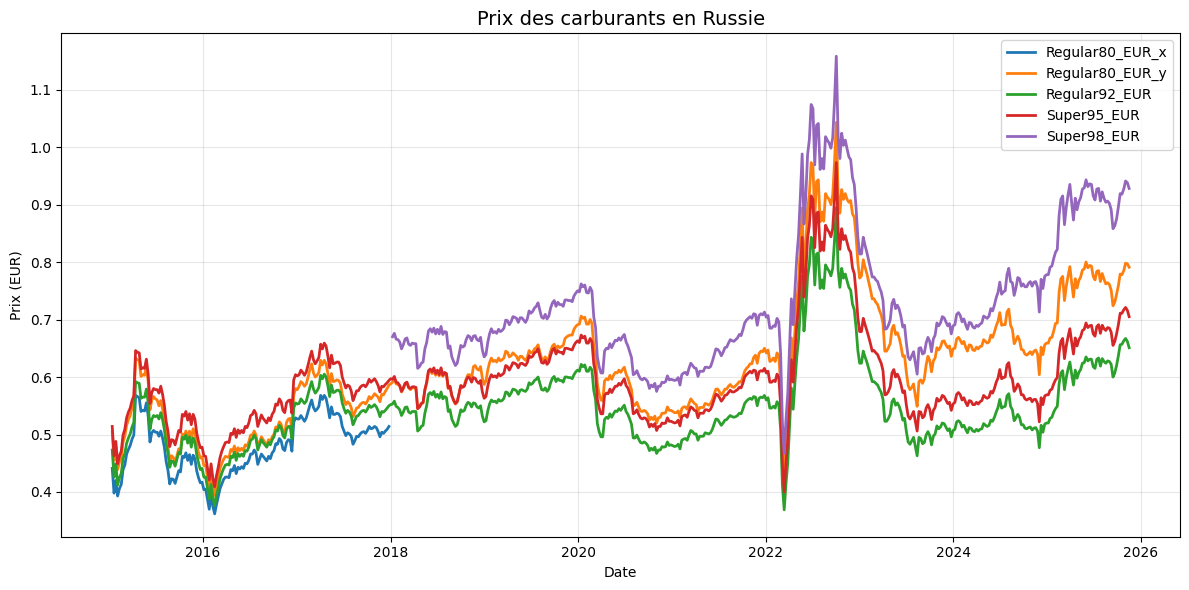

In [28]:

# 1. Agrégation de tous les DataFrames de la liste en un seul
# On utilise 'outer' pour ne perdre aucune donnée si les dates diffèrent
df_plot = reduce(lambda left, right: pd.merge(left, right, on='Date', how='outer'), liste_finale_EUR)

# 2. Préparation et Tracé
df_plot.set_index('Date').sort_index().plot(figsize=(12, 6), linewidth=2)

# 3. Cosmétique rapide
plt.title("Prix des carburants en Russie", fontsize=14)
plt.ylabel("Prix (EUR)")
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()

plt.show()

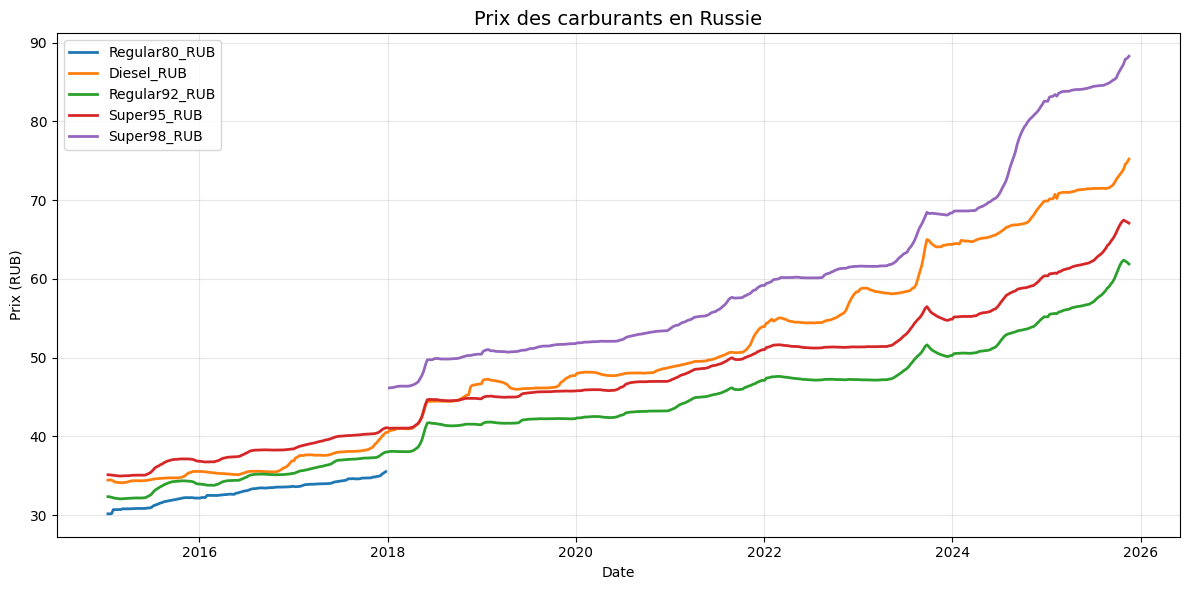

In [30]:
df_plot = reduce(lambda left, right: pd.merge(left, right, on='Date', how='outer'), liste_finale_RUB)

# 2. Préparation et Tracé
df_plot.set_index('Date').sort_index().plot(figsize=(12, 6), linewidth=2)

# 3. Cosmétique rapide
plt.title("Prix des carburants en Russie", fontsize=14)
plt.ylabel("Prix (RUB)")
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()

plt.show()